# Medical Image Segmentation Using 🤗 HuggingFace & PyTorch

Medical image segmentation is an innovative process that enables surgeons to have a virtual "x-ray vision." It is a highly valuable tool in healthcare, providing non-invasive diagnostics and in-depth analysis. With this in mind, in this post, we will explore the UW-Madison GI Tract Image Segmentation Kaggle challenge dataset. As part of this project, we will utilize PyTorch along with PyTorch-Lightning. We will use 🤗 HuggingFace transformers to load and fine-tune the Segformer transformer-based model on the medical segmentation dataset. Finally, we will create a Gradio app for image inference and deploy it on HuggingFace spaces.

# 基于🤗HuggingFace与PyTorch的医学图像分割

医学图像分割是一项创新技术，它赋予外科医生虚拟的“透视眼”能力。作为医疗领域极具价值的工具，该技术可实现无创诊断与深度分析。基于此，本文将深入探讨威斯康星大学麦迪逊分校胃肠道图像分割Kaggle挑战赛数据集。项目中我们将结合使用PyTorch与PyTorch-Lightning框架，借助🤗HuggingFace Transformer加载并针对医学分割数据集对Segformer模型进行微调。最终构建Gradio图像推理应用，并部署至HuggingFace Spaces平台。

<img src="https://learnopencv.com/wp-content/uploads/2023/07/medical-image-segmentation_feature_Image.png">

## Table of Contents


* [1 Install & Import Necessary Libraries](#1-Install-&-Import-Necessary-Libraries)
* [2 Set Hyperparameters For The Project](#2-Set-Hyperparameters-For-The-Project)
* [3 Loading The Medical Image Segmentation Dataset](#3-Loading-The-Medical-Image-Segmentation-Dataset)
    * [3.1 Defining A Custom PyTorch Dataset Class For Medical Image Segmentation](#3.1-Defining-A-Custom-PyTorch-Dataset-Class-For-Medical-Image-Segmentation)
    * [3.2 Defining The Custom LightningDataModule Class](#3.2-Defining-The-Custom-LightningDataModule-Class)
    * [3.3 Visualization Helper Functions](#3.3-Visualization-Helper-Functions)
    * [3.4 Display Sample Images From The Dataset](#3.4-Display-Sample-Images-From-The-Dataset)
* [4 Loading SegFormer From 🤗 HuggingFace](#4-Loading-SegFormer-From-🤗-HuggingFace)
* [5 Evaluation Metric & Loss Function](#5-Evaluation-Metric--&-Loss-Function)
    * [5.1 Custom Loss Functions - Smooth Dice + Cross-Entropy](#5.1-Custom-Loss-Functions---Smooth-Dice-+-Cross-Entropy)
    * [5.2 Evaluation Metric - Dice Coefficient (F1-Score)](#5.2-Evaluation-Metric---Dice-Coefficient-(F1-Score))
* [6 Creating The Custom LightningModule Class](#6-Creating-The-Custom-LightningModule-Class)
* [7 Start Training](#7-Start-Training)
* [8 Inference on the Medical Segmentation Dataset](#8-Inference-on-the-Medical-Segmentation-Dataset)
    * [8.1 Load The Best Trained Model](#8.1-Load-The-Best-Trained-Model)
    * [8.2 Evaluate Model On Validation Dataset](#8.2-Evaluate-Model-On-Validation-Dataset)
    * [8.3 Image Inference Using DataLoader Objects](#8.3-Image-Inference-Using-DataLoader-Objects)
* [9 Summary](#9-Summary)
## 目录


* [1 安装并导入必要库](#1-Install-&-Import-Necessary-Libraries)
* [2 为项目设置超参数](#2-Set-Hyperparameters-For-The-Project)
* [3 加载医学图像分割数据集](#3-加载-医学图像分割数据集)
    * [3.1 定义医学图像分割的自定义 PyTorch 数据集类](#3.1-Defining-A-Custom-PyTorch-Dataset-Class-For-Medical-Image-Segmentation)
    * [3.2 定义自定义 LightningDataModule 类](#3.2-Defining-The-Custom-LightningDataModule-Class)
    * [3.3 可视化辅助函数](#3.3-Visualization-Helper-Functions)
    * [3.4 展示数据集样本图像](#3.4-Display-Sample-Images-From-The-Dataset)
* [4 从🤗HuggingFace加载SegFormer](#4-Loading-SegFormer-From-🤗-HuggingFace)
* [5 评估指标与损失函数](#5-Evaluation-Metric--&-Loss-Function)
    * [5.1 自定义损失函数 - 平滑Dice + 交叉熵](#5.1-Custom-Loss-Functions---Smooth-Dice-+-Cross-Entropy)
    * [5.2 评估指标 - Dice系数（F1分数）](#5.2-Evaluation-Metric---Dice-Coefficient-(F1-Score))
* [6 创建自定义LightningModule类](#6-Creating-The-Custom-LightningModule-Class)
* [7 开始训练](#7-Start-Training)
* [8 医疗分割数据集推理](#8-Inference-on-the-Medical-Segmentation-Dataset)
    * [8.1 加载最佳训练模型](#8.1-Load-The-Best-Trained-Model)
    * [8.2 在验证数据集上评估模型](#8.2-Evaluate-Model-On-Validation-Dataset)
    * [8.3 使用DataLoader对象进行图像推理](#8.3-Image-Inference-Using-DataLoader-Objects)
* [9 总结](#9-Summary)



## What is Medical Image Segmentation?
## 什么是医学图像分割？

Medical image segmentation is a process that involves dividing medical images, such as CT scans or MRI scans, into distinct regions or structures of interest. This technique is used to identify and isolate specific areas within the image, which is crucial for diagnosis, treatment planning, and monitoring of diseases. It can be done manually by experts or automated using computer algorithms and machine learning. Medical image segmentation plays a vital role in various medical specialties and enables quantitative analysis and precise measurements.

医学图像分割是一种将医学影像（如CT扫描或MRI扫描）划分为不同区域或目标结构的过程。该技术用于识别并隔离图像中的特定区域，这对疾病诊断、治疗方案制定及病情监测至关重要。该过程可由专家手动完成，也可通过计算机算法和机器学习实现自动化。医学图像分割在多个医学领域发挥着关键作用，为定量分析和精确测量提供了可能。

The dataset for this project is taken from the <a href="https://www.kaggle.com/competitions/uw-madison-gi-tract-image-segmentation/overview" target="_blank">UW-Madison GI Tract Image Segmentation</a> Kaggle competition. The dataset consists of 3 classes: the stomach, small bowel, and large bowel.

<img src="https://learnopencv.com/wp-content/uploads/2023/07/medical-image-segmentation_competition_dataset_example.png">

本项目数据集取自<a href="https://www.kaggle.com/competitions/uw-madison-gi-tract-image-segmentation/overview" target="_blank">威斯康星大学麦迪逊分校胃肠道图像分割</a>Kaggle竞赛。该数据集包含3类结构：胃部、小肠和大肠。

<img src="https://learnopencv.com/wp-content/uploads/2023/07/medical-image-segmentation_competition_dataset_example.png">

**Note:** In this notebook, we'll work with the final processed dataset.

**注意**:在本笔记中，我们将处理最终的处理后数据集。

## 1 Install & Import Necessary Libraries
## 1 安装并导入必要库

Before we begin the coding part, we need to ensure we have all the required libraries installed. For this project, apart from PyTorch, we are installing additional tools to help ease the implementation process.

The major ones are:

<img src="https://learnopencv.com/wp-content/uploads/2023/07/medical-image-segmentation_tool_logos.png">

1. `transformers`: To load SegFormer transformer model.
2. `lightning`: To simplify and structure code implementations.
3. `torchmetrics`: For evaluating the model's performance.
4. `wandb`: For experiment tracking.
5. `albumentations`:  For applying augmentations.

在开始编码部分之前，我们需要确保已安装所有必需的库。对于这个项目，除了PyTorch之外，我们还将安装额外的工具以简化实现过程。

主要库包括：

<img src="https://learnopencv.com/wp-content/uploads/2023/07/medical-image-segmentation_tool_logos.png">

1. `transformers`：用于加载SegFormer变换器模型。
2. `lightning`：简化并规范代码实现结构。
3. `torchmetrics`：用于评估模型性能。
4. `wandb`：用于实验追踪。
5. `albumentations`：用于应用数据增强技术。

In [1]:
# 检查GPU可用性
!nvidia-smi

Tue Oct 14 21:02:31 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 560.94                 Driver Version: 560.94         CUDA Version: 12.6     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                  Driver-Model | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA GeForce RTX 4060 ...  WDDM  |   00000000:01:00.0  On |                  N/A |
| N/A   56C    P5              7W /  117W |    2124MiB /   8188MiB |     12%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

1.2 Import Libraries and Check Environment
### 1.2 导入库并检查环境

In [2]:
# 系统相关
import os
import platform
import sys
import warnings
import zipfile
from dataclasses import dataclass
from glob import glob
from typing import Tuple, Dict, Optional

# 忽略警告
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

# Windows系统的多进程设置
print("="*70)
print("系统信息检查")
print("="*70)
print(f"Python版本: {sys.version.split()[0]}")
print(f"操作系统: {platform.system()} {platform.release()}")
print(f"工作目录: {os.getcwd()}")

系统信息检查
Python版本: 3.11.13
操作系统: Windows 10
工作目录: E:\VSCode_Project\Segformer_medical_lightning


In [3]:
# 数据处理相关
import cv2
import requests
import numpy as np
import matplotlib.pyplot as plt

# PyTorch相关
import torch
import torch.optim as optim
import torch.nn.functional as F

# 启用cudnn.benchmark以加速训练
torch.backends.cudnn.benchmark = True
from torch.utils.data import Dataset, DataLoader

# 数据增强
import albumentations as A
from albumentations.pytorch import ToTensorV2

# HuggingFace模型
from transformers import SegformerForSemanticSegmentation

# PyTorch Lightning
import lightning.pytorch as pl
from lightning.pytorch.loggers import WandbLogger
from lightning.pytorch.callbacks import LearningRateMonitor, ModelCheckpoint

# 评估指标
from torchmetrics import MeanMetric
from torchmetrics.classification import MulticlassF1Score

# 模型摘要
from torchinfo import summary

print("\n" + "="*70)
print("依赖库版本信息")
print("="*70)
print(f"PyTorch版本: {torch.__version__}")
print(f"NumPy版本: {np.__version__}")
print(f"OpenCV版本: {cv2.__version__}")

# 检查CUDA
cuda_available = torch.cuda.is_available()
print(f"\nCUDA可用: {cuda_available}")
if cuda_available:
    print(f"CUDA版本: {torch.version.cuda}")
    print(f"GPU设备: {torch.cuda.get_device_name(0)}")
    print(f"GPU数量: {torch.cuda.device_count()}")
    print(f"当前GPU: {torch.cuda.current_device()}")
else:
    print("⚠️ 警告: CUDA不可用，将使用CPU训练（速度会很慢）")

print("\n✓ 所有依赖库已成功导入！")

E:\Anaconda\envs\Pytorch\Lib\site-packages\requests\__init__.py:86: RequestsDependencyWarning: Unable to find acceptable character detection dependency (chardet or charset_normalizer).
  warnings.warn(



依赖库版本信息
PyTorch版本: 2.6.0+cu124
NumPy版本: 2.3.3
OpenCV版本: 4.10.0

CUDA可用: True
CUDA版本: 12.4
GPU设备: NVIDIA GeForce RTX 4060 Laptop GPU
GPU数量: 1
当前GPU: 0

✓ 所有依赖库已成功导入！


For this project, instead of the default tensorboard used by pytorch-lightning for tracking experiments, we will use a proper MLOps tool: Weights & Biases (WandB).

The following code cell will help us to log into our `wandb` account.

The code cell will ask you to paste your API key in the dialogue box. You need to click on the <a href="https://wandb.ai/authorize" target="_blank">Sign In with Auth0</a> link provided.

在此项目中，我们将采用专业的MLOps工具Weights & Biases（WandB）来追踪实验，而非PyTorch Lightning默认使用的TensorBoard。

以下代码单元将帮助我们登录`wandb`账户。

代码单元格将在对话框中提示您粘贴API密钥。您需要点击提供的<a href="https://wandb.ai/authorize" target="_blank">使用Auth0登录</a>链接。

1.3 Logging into Weights & Biases (Optional)
If you wish to use WandB for experiment tracking, run the code below. Otherwise, you may skip this step.

### 1.3 登录Weights & Biases (可选)
如果您想使用WandB进行实验追踪，请运行下面的代码。否则可以跳过。

In [4]:
# 登录WandB（可选）
USE_WANDB = True  # 设置为True以启用WandB

if USE_WANDB:
    import wandb
    try:
        wandb.login()
        print("✓ WandB登录成功！")
    except Exception as e:
        print(f"⚠️ WandB登录失败: {e}")
        USE_WANDB = False
else:
    print("ℹ️ 跳过WandB登录（USE_WANDB=False）")

wandb: Currently logged in as: tingwulin9 to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


✓ WandB登录成功！


## 2 Set Hyperparameters For The Project
## 2 为项目设置超参数


Next, we will declare all the different hyperparameters used for the project. For this, we are defining three dataclasses. They will be used throughout the notebook.


1. `DatasetConfig`  – A class that holds all the hyperparameters we will use to process images. It contains the following information:
    1. Image size to use.
    2. Number of classes present in the dataset,
    3. The mean and standard deviation to use for image normalization.
    4. URL of the preprocessed dataset.
    5. Directory path to download the dataset to.

2. `Paths` – This class contains the locations of the images and masks of the train and validation sets. It uses the “root dataset path”  set DatasetConfig as the base.

3. `TrainingConfig` –  A class that holds all the hyperparameters we will use for training and evaluation.  It contains the following information:
    1. Batch size.
    2. Initial learning rate.
    3. The number of epochs to train the model.
    4. The number of workers to use for data loading.
    4. Model, optimizer & learning rate scheduler-related configurations.

4. `InferenceConfig` – This class contains the (optional) batch size and the number of batches we will use to display our inference results at the end.

接下来，我们将声明项目中使用的所有不同超参数。为此，我们定义了三个数据类，它们将在整个笔记本中使用。


1. `DatasetConfig`  – 用于存储图像处理所有超参数的类，包含以下信息：
    1. 使用的图像尺寸
    2. 数据集中的类别数量
    3. 图像归一化所需的均值与标准差
    4. 预处理数据集的URL
    5. 数据集下载目录路径

2. `Paths` – 该类包含训练集和验证集图像及掩膜的位置，以 DatasetConfig 中设置的“根数据集路径”为基准路径。

3. `TrainingConfig` – 用于存储训练和评估所需所有超参数的类，包含以下信息：
    1. 批量大小
    2. 初始学习率
    3. 模型训练的 epoch 数。
    4. 数据加载使用的 worker 数量。
    4. 模型、优化器及学习率调度器相关配置。

4. `InferenceConfig` – 该类包含（可选）批量大小和批次数量，用于在最终展示推理结果时使用。

Note: We’ve uploaded the preprocessed dataset to our Dropbox and <a href="https://www.kaggle.com/datasets/learnopencvblog/uwm-gi-tract-segmentation-img-msk-split" target="_blank">Kaggle</a> accounts. There are two options. You can manually download the dataset and move it to your workstation or utilize the data download code we’ve written below to do it automatically.

注：我们已将预处理后的数据集上传至Dropbox和<a href="https://www.kaggle.com/datasets/learnopencvblog/uwm-gi-tract-segmentation-img-msk-split" target="_blank">Kaggle</a>账户。您有两种选择： 您可手动下载数据集并将其移动至工作站，或使用我们编写的数据下载代码实现自动下载。

In [5]:
@dataclass(frozen=True)
class DatasetConfig:
    """数据集配置"""
    NUM_CLASSES: int = 4  # 包括背景
    IMAGE_SIZE: Tuple[int, int] = (288, 288)  # (宽, 高)
    MEAN: Tuple[float, float, float] = (0.485, 0.456, 0.406)  # ImageNet均值
    STD: Tuple[float, float, float] = (0.229, 0.224, 0.225)   # ImageNet标准差
    BACKGROUND_CLS_ID: int = 0
    
    # 数据集下载URL（Dropbox）
    URL: str = r"https://www.dropbox.com/scl/fi/r0685arupp33sy31qhros/dataset_UWM_GI_Tract_train_valid.zip?rlkey=w4ga9ysfiuz8vqbbywk0rdnjw&dl=1"
    
    # 数据集存储路径
    DATASET_PATH: str = os.path.join(os.getcwd(), "dataset_UWM_GI_Tract_train_valid")


@dataclass(frozen=True)
class Paths:
    """数据路径配置"""
    # 训练集路径
    DATA_TRAIN_IMAGES: str = os.path.join(DatasetConfig.DATASET_PATH, "train", "images", r"*.png")
    DATA_TRAIN_LABELS: str = os.path.join(DatasetConfig.DATASET_PATH, "train", "masks", r"*.png")
    
    # 验证集路径
    DATA_VALID_IMAGES: str = os.path.join(DatasetConfig.DATASET_PATH, "valid", "images", r"*.png")
    DATA_VALID_LABELS: str = os.path.join(DatasetConfig.DATASET_PATH, "valid", "masks", r"*.png")


@dataclass
class TrainingConfig:
    """训练配置"""
    # 基础训练参数
    BATCH_SIZE: int = 6  # 方案3: 平衡性能与显存，适合8GB GPU
    NUM_EPOCHS: int = 100
    INIT_LR: float = 3e-4
    
    # 数据加载
    NUM_WORKERS: int = 0  # Windows多进程不稳定,暂时禁用
    
    # 优化器配置
    OPTIMIZER_NAME: str = "AdamW"
    WEIGHT_DECAY: float = 1e-4
    
    # 学习率调度器
    USE_SCHEDULER: bool = True
    SCHEDULER: str = "MultiStepLR"
    
    # 模型配置
    MODEL_NAME: str = "nvidia/segformer-b0-finetuned-ade-512-512"
    # 可选更小的模型: "nvidia/segformer-b0-finetuned-ade-512-512"
    

@dataclass
class InferenceConfig:
    """推理配置"""
    BATCH_SIZE: int = 6  # 与训练配置保持一致
    NUM_BATCHES: int = 2  # 可视化的批次数


# 打印配置信息
print("="*70)
print("配置信息")
print("="*70)
print(f"\n数据集配置:")
print(f"  - 图像大小: {DatasetConfig.IMAGE_SIZE}")
print(f"  - 类别数量: {DatasetConfig.NUM_CLASSES}")
print(f"  - 数据集路径: {DatasetConfig.DATASET_PATH}")

print(f"\n训练配置:")
print(f"  - 批次大小: {TrainingConfig.BATCH_SIZE}")
print(f"  - 训练轮数: {TrainingConfig.NUM_EPOCHS}")
print(f"  - 初始学习率: {TrainingConfig.INIT_LR}")
print(f"  - 优化器: {TrainingConfig.OPTIMIZER_NAME}")
print(f"  - 模型: {TrainingConfig.MODEL_NAME.split('/')[-1]}")
print(f"  - 数据加载线程数: {TrainingConfig.NUM_WORKERS}")

print("\n✓ 配置加载完成！")

配置信息

数据集配置:
  - 图像大小: (288, 288)
  - 类别数量: 4
  - 数据集路径: E:\VSCode_Project\Segformer_medical_lightning\dataset_UWM_GI_Tract_train_valid

训练配置:
  - 批次大小: 6
  - 训练轮数: 100
  - 初始学习率: 0.0003
  - 优化器: AdamW
  - 模型: segformer-b0-finetuned-ade-512-512
  - 数据加载线程数: 0

✓ 配置加载完成！


In [6]:
# PyTorch配置
# 设置float32矩阵乘法精度
torch.set_float32_matmul_precision('high')

# 优化CUDA内存分配（避免碎片化）
os.environ["PYTORCH_CUDA_ALLOC_CONF"] = "expandable_segments:True"

# 启用确定性算法（提高可重复性）
os.environ["CUBLAS_WORKSPACE_CONFIG"] = ":16:8"

# Matplotlib配置
%matplotlib inline
plt.rcParams['figure.dpi'] = 100
plt.rcParams['savefig.dpi'] = 100

print("✓ PyTorch和Matplotlib配置完成！")

✓ PyTorch和Matplotlib配置完成！


## 3 Loading The Medical Image Segmentation Dataset
## 3 加载医学图像分割数据集

**Set class ID to RGB color mapping and vice versa.**

**将类ID映射至RGB颜色值，反之亦然。**

In [7]:
# 类别ID到RGB颜色的映射
id2color = {
    0: (0, 0, 0),      # 背景 - 黑色
    1: (0, 0, 255),    # 胃部 - 蓝色
    2: (0, 255, 0),    # 小肠 - 绿色
    3: (255, 0, 0),    # 大肠 - 红色
}

# 类别名称
id2name = {
    0: "Background (背景)",
    1: "Stomach (胃部)",
    2: "Small Bowel (小肠)",
    3: "Large Bowel (大肠)"
}

# 反向映射（RGB到ID）
color2id = {value: key for key, value in id2color.items()}

# 验证类别数量
assert DatasetConfig.NUM_CLASSES == len(id2color), "类别数量不匹配！"

print("="*70)
print("类别信息")
print("="*70)
for class_id, color in id2color.items():
    print(f"类别 {class_id}: {id2name[class_id]:<25} RGB{color}")
print("\n✓ 类别映射设置完成！")

类别信息
类别 0: Background (背景)           RGB(0, 0, 0)
类别 1: Stomach (胃部)              RGB(0, 0, 255)
类别 2: Small Bowel (小肠)          RGB(0, 255, 0)
类别 3: Large Bowel (大肠)          RGB(255, 0, 0)

✓ 类别映射设置完成！


### 3.1 Defining A Custom PyTorch Dataset Class For Medical Image Segmentation
### 3.1 定义用于医学图像分割的自定义 PyTorch 数据集类

First, we will define our custom PyTorch `Dataset` class. This custom is designed to load images and masks for each image. The `Dataset` class is essential for efficient and organized data handling in machine learning tasks. It provides a standardized interface to load and preprocess data samples from various sources. Encapsulating the dataset into a single object simplifies data management. It enables seamless integration with other PyTorch components like data loaders and models. 

The custom class performs the following functions:

1. Load each image-mask pair.
2. Apply geometric and pixel augmentations if the pair belongs to the training set.
3. Apply preprocessing transformations such as normalization and standardization.

首先，我们将定义自定义的PyTorch `Dataset`类。该类旨在加载图像及其对应的掩膜。`Dataset`类对于机器学习任务中高效有序的数据处理至关重要，它提供了一个标准化接口，用于从不同来源加载并预处理数据样本。将数据集封装为单一对象可简化数据管理，并能与数据加载器、模型等其他PyTorch组件无缝集成。

该自定义类执行以下功能：

1. 加载每组图像-掩膜配对数据
2. 若配对数据属于训练集，则应用几何与像素增强操作
3. 执行预处理变换，如归一化与标准化处理

In [8]:
class MedicalDataset(Dataset):
    """医学图像分割数据集
    
    功能:
    1. 加载图像和对应的分割掩码
    2. 对训练集应用数据增强
    3. 标准化和归一化图像
    """
    
    def __init__(
        self, 
        *,  # 强制使用关键字参数
        image_paths: list,
        mask_paths: list,
        img_size: Tuple[int, int],
        ds_mean: Tuple[float, float, float],
        ds_std: Tuple[float, float, float],
        is_train: bool = False
    ):
        """初始化数据集
        
        Args:
            image_paths: 图像文件路径列表
            mask_paths: 掩码文件路径列表
            img_size: 图像大小 (宽, 高)
            ds_mean: 归一化均值
            ds_std: 归一化标准差
            is_train: 是否为训练集（决定是否使用数据增强）
        """
        assert len(image_paths) == len(mask_paths), "图像和掩码数量不匹配！"
        
        self.image_paths = image_paths
        self.mask_paths = mask_paths
        self.is_train = is_train
        self.img_size = img_size
        self.ds_mean = ds_mean
        self.ds_std = ds_std
        self.transforms = self.setup_transforms(mean=self.ds_mean, std=self.ds_std)

    def __len__(self) -> int:
        """返回数据集大小"""
        return len(self.image_paths)

    def setup_transforms(self, *, mean, std) -> A.Compose:
        """设置数据增强和预处理变换
        
        训练集增强包括:
        - 随机水平/垂直翻转
        - 随机旋转、缩放、平移
        - 随机亮度对比度调整
        - 随机遮挡(Coarse Dropout)
        
        所有数据集都会进行:
        - 归一化
        - 转换为Tensor格式
        """
        transforms = []

        # 训练集数据增强
        if self.is_train:
            transforms.extend([
                A.HorizontalFlip(p=0.5),
                A.VerticalFlip(p=0.5),
                A.ShiftScaleRotate(
                    scale_limit=0.12, 
                    rotate_limit=15, 
                    shift_limit=0.12, 
                    p=0.5
                ),
                A.RandomBrightnessContrast(p=0.5),
                A.CoarseDropout(
                    max_holes=8,
                    max_height=self.img_size[1] // 20,
                    max_width=self.img_size[0] // 20,
                    min_holes=5,
                    fill_value=0,
                    mask_fill_value=0,
                    p=0.5
                )
            ])

        # 预处理变换（归一化 + 转Tensor）
        transforms.extend([
            A.Normalize(mean=mean, std=std, always_apply=True),
            ToTensorV2(),  # (H, W, C) -> (C, H, W)
        ])
        
        return A.Compose(transforms)

    def load_file(self, file_path: str, depth: int = 0) -> np.ndarray:
        """加载并调整图像/掩码大小
        
        Args:
            file_path: 文件路径
            depth: 读取模式 (0=灰度图, cv2.IMREAD_COLOR=彩色图)
            
        Returns:
            调整大小后的图像数组
        """
        file = cv2.imread(file_path, depth)
        
        # 如果是彩色图，转换BGR到RGB
        if depth == cv2.IMREAD_COLOR:
            file = cv2.cvtColor(file, cv2.COLOR_BGR2RGB)
            
        # 调整大小
        return cv2.resize(file, self.img_size, interpolation=cv2.INTER_NEAREST)

    def __getitem__(self, index: int) -> Tuple[torch.Tensor, torch.Tensor]:
        """获取单个样本
        
        Args:
            index: 样本索引
            
        Returns:
            (image, mask) 元组
        """
        # 加载图像和掩码
        image = self.load_file(self.image_paths[index], depth=cv2.IMREAD_COLOR)
        mask = self.load_file(self.mask_paths[index], depth=cv2.IMREAD_GRAYSCALE)
        
        # 应用变换
        transformed = self.transforms(image=image, mask=mask)
        image, mask = transformed["image"], transformed["mask"].to(torch.long)
        
        return image, mask


print("✓ MedicalDataset类定义完成！")

✓ MedicalDataset类定义完成！


### 3.2 Defining The Custom LightningDataModule Class
### 3.2 定义自定义 LightningDataModule 类

In this section, we will define the custom `MedicalSegmentationDataModule` class inherited from Lightning’s `LightningDataModule` class. It helps organize and encapsulate all the data-related operations and logic in a PyTorch project. It acts as a bridge between your data and Lightning’s training pipeline. It is a convenient abstraction that encapsulates data-related operations, promotes code organization, and facilitates seamless integration with other Lightning components for efficient and reproducible deep-learning experiments.

The class will perform the following functions:

1. Download the dataset from Dropbox.
2. Create a MedicalDataset class object for each set.
3. Create and return the DataLoader objects for each set.


The class methods we need to define are as follows:

1. `prepare_data(..)`: This method is used for data preparation, like downloading and one-time preprocessing with the dataset. When training in a distributed setting, this will be called from each GPU machine.
2. `setup(...)`:  When you want to perform data operations on every GPU, this method is apt for it will call from every GPU. For example, perform train/val/test splits.
3. `train_dataloader(...)`: This method returns the train dataloader.
4. `val_dataloader(...)` : This method returns validation dataloader.

在本节中，我们将定义继承自Lightning的`LightningDataModule`类的自定义`MedicalSegmentationDataModule`类。该类有助于在PyTorch项目中组织和封装所有数据相关的操作与逻辑，充当数据与Lightning训练管道之间的桥梁。该类提供便捷的抽象封装，既能促进代码组织，又能实现与其他Lightning组件的无缝集成，从而高效开展可复现的深度学习实验。

该类将执行以下功能：

1. 从Dropbox下载数据集
2. 为每个数据集创建MedicalDataset类对象
3. 为每个数据集创建并返回DataLoader对象。


需定义的类方法如下：

1. `prepare_data(..)`：用于数据准备操作，如下载数据集及一次性预处理。分布式训练时，该方法将在每台GPU机器上调用。
2. `setup(...)`：当需要对所有GPU执行数据操作时，此方法可实现全局调用，例如执行训练/验证/测试集划分。
3. `train_dataloader(...)`：返回训练数据加载器。
4. `val_dataloader(...)`：返回验证数据加载器。

In [9]:
class MedicalSegmentationDataModule(pl.LightningDataModule):
    """医学分割数据模块
    
    功能:
    1. 自动下载和解压数据集
    2. 创建训练和验证数据集
    3. 返回DataLoader对象
    """
    
    def __init__(
        self,
        num_classes: int = 4,
        img_size: Tuple[int, int] = (288, 288),
        ds_mean: Tuple[float, float, float] = (0.485, 0.456, 0.406),
        ds_std: Tuple[float, float, float] = (0.229, 0.224, 0.225),
        batch_size: int = 32,
        num_workers: int = 0,
        pin_memory: bool = False,
        shuffle_validation: bool = False,
    ):
        super().__init__()

        self.num_classes = num_classes
        self.img_size = img_size
        self.ds_mean = ds_mean
        self.ds_std = ds_std
        self.batch_size = batch_size
        self.num_workers = num_workers
        self.pin_memory = pin_memory
        self.shuffle_validation = shuffle_validation

    def prepare_data(self):
        """下载和准备数据（仅在主进程执行一次）"""
        dataset_zip_path = f"{DatasetConfig.DATASET_PATH}.zip"

        # 检查数据集是否已存在
        if os.path.exists(DatasetConfig.DATASET_PATH):
            print(f"✓ 数据集已存在: {DatasetConfig.DATASET_PATH}")
            return

        print(f"\n正在下载数据集...")
        print(f"URL: {DatasetConfig.URL[:50]}...")
        
        try:
            # 下载数据集
            response = requests.get(DatasetConfig.URL, stream=True)
            total_size = int(response.headers.get('content-length', 0))
            
            with open(dataset_zip_path, "wb") as f:
                downloaded = 0
                for chunk in response.iter_content(chunk_size=8192):
                    if chunk:
                        f.write(chunk)
                        downloaded += len(chunk)
                        if total_size > 0:
                            progress = downloaded / total_size * 100
                            print(f"\r下载进度: {progress:.1f}%", end="")
            
            print("\n下载完成！正在解压...")
            
            # 解压数据集
            with zipfile.ZipFile(dataset_zip_path, 'r') as zip_ref:
                zip_ref.extractall(os.path.dirname(dataset_zip_path))
            
            print("解压完成！")
            
            # 删除zip文件释放空间
            os.remove(dataset_zip_path)
            print(f"✓ 数据集准备完成: {DatasetConfig.DATASET_PATH}")
            
        except Exception as e:
            print(f"\n✗ 数据集下载/解压失败: {e}")
            if os.path.exists(dataset_zip_path):
                os.remove(dataset_zip_path)
            raise

    def setup(self, stage: Optional[str] = None):
        """设置数据集（在每个进程中执行）"""
        # 获取所有图像和掩码路径
        train_imgs = sorted(glob(Paths.DATA_TRAIN_IMAGES))
        train_msks = sorted(glob(Paths.DATA_TRAIN_LABELS))
        valid_imgs = sorted(glob(Paths.DATA_VALID_IMAGES))
        valid_msks = sorted(glob(Paths.DATA_VALID_LABELS))

        # 验证数据完整性
        assert len(train_imgs) > 0, f"未找到训练图像: {Paths.DATA_TRAIN_IMAGES}"
        assert len(train_imgs) == len(train_msks), "训练图像和掩码数量不匹配！"
        assert len(valid_imgs) == len(valid_msks), "验证图像和掩码数量不匹配！"

        print(f"\n数据集统计:")
        print(f"  - 训练集: {len(train_imgs)} 张图像")
        print(f"  - 验证集: {len(valid_imgs)} 张图像")

        # 创建数据集对象
        self.train_ds = MedicalDataset(
            image_paths=train_imgs,
            mask_paths=train_msks,
            img_size=self.img_size,
            is_train=True,
            ds_mean=self.ds_mean,
            ds_std=self.ds_std
        )

        self.valid_ds = MedicalDataset(
            image_paths=valid_imgs,
            mask_paths=valid_msks,
            img_size=self.img_size,
            is_train=False,
            ds_mean=self.ds_mean,
            ds_std=self.ds_std
        )

    def train_dataloader(self) -> DataLoader:
        """返回训练数据加载器"""
        return DataLoader(
            self.train_ds,
            batch_size=self.batch_size,
            pin_memory=self.pin_memory,
            num_workers=self.num_workers,
            drop_last=True,  # 丢弃最后不完整的批次
            shuffle=True,
        )

    def val_dataloader(self) -> DataLoader:
        """返回验证数据加载器"""
        return DataLoader(
            self.valid_ds,
            batch_size=self.batch_size,
            pin_memory=self.pin_memory,
            num_workers=self.num_workers,
            shuffle=self.shuffle_validation,
        )


print("✓ MedicalSegmentationDataModule类定义完成！")


✓ MedicalSegmentationDataModule类定义完成！


**Usage**: Let's download the dataset and initialize train and validation data loaders. We’ll use them to visualize the dataset.

**用法**：让我们下载数据集并初始化训练集和验证集数据加载器。我们将使用它们来可视化数据集。

In [10]:
%%time

print("="*70)
print("准备数据集")
print("="*70)

# 初始化数据模块
dm = MedicalSegmentationDataModule(
    num_classes=DatasetConfig.NUM_CLASSES,
    img_size=DatasetConfig.IMAGE_SIZE,
    ds_mean=DatasetConfig.MEAN,
    ds_std=DatasetConfig.STD,
    batch_size=InferenceConfig.BATCH_SIZE,
    num_workers=0,  # PyCharm中建议使用0
    shuffle_validation=True,
)

# 下载数据集（如果需要）
dm.prepare_data()

# 设置数据集
dm.setup()

# 获取数据加载器
train_loader = dm.train_dataloader()
valid_loader = dm.val_dataloader()

print(f"\n✓ 数据集准备完成！")
print(f"  - 训练批次数: {len(train_loader)}")
print(f"  - 验证批次数: {len(valid_loader)}")

准备数据集
✓ 数据集已存在: E:\VSCode_Project\Segformer_medical_lightning\dataset_UWM_GI_Tract_train_valid

数据集统计:
  - 训练集: 13238 张图像
  - 验证集: 3352 张图像

✓ 数据集准备完成！
  - 训练批次数: 2206
  - 验证批次数: 559
CPU times: total: 125 ms
Wall time: 102 ms


### 3.3 Visualization Helper Functions

### 3.3 可视化辅助函数

To help visualize our dataset, we need to define some additional helper functions. They are as follows:

A) `num_to_rgb(...)`: Function will be used to convert single-channel mask representations to an integrated RGB mask for visualization purposes

为便于可视化数据集，我们需要定义若干辅助函数，具体如下：

A) `num_to_rgb(...)`：该函数用于将单通道掩膜表示转换为集成RGB掩膜，以满足可视化需求

In [11]:
def num_to_rgb(num_arr: np.ndarray, color_map: Dict[int, Tuple[int, int, int]] = id2color) -> np.ndarray:
    """将单通道掩码转换为RGB掩码
    
    Args:
        num_arr: 单通道掩码数组 shape: (H, W) 或 (H, W, 1)
        color_map: 类别ID到RGB颜色的映射
        
    Returns:
        RGB掩码数组 shape: (H, W, 3), 范围[0.0, 1.0]
    """
    single_layer = np.squeeze(num_arr)
    output = np.zeros((*single_layer.shape, 3), dtype=np.float32)

    for class_id, color in color_map.items():
        output[single_layer == class_id] = color

    # 归一化到[0, 1]
    return output / 255.0


def image_overlay(image: np.ndarray, segmented_image: np.ndarray, alpha: float = 1.0, beta: float = 0.7) -> np.ndarray:
    """将分割掩码叠加到原始图像上
    
    Args:
        image: 原始RGB图像
        segmented_image: RGB分割掩码
        alpha: 原始图像的透明度
        beta: 分割掩码的透明度
        
    Returns:
        叠加后的图像
    """
    # 转换为uint8格式用于cv2处理
    image_uint8 = (image * 255).astype(np.uint8)
    seg_uint8 = (segmented_image * 255).astype(np.uint8)
    
    # BGR转换
    image_bgr = cv2.cvtColor(image_uint8, cv2.COLOR_RGB2BGR)
    seg_bgr = cv2.cvtColor(seg_uint8, cv2.COLOR_RGB2BGR)
    
    # 叠加
    overlayed = cv2.addWeighted(image_bgr, alpha, seg_bgr, beta, 0)
    
    # 转回RGB
    overlayed_rgb = cv2.cvtColor(overlayed, cv2.COLOR_BGR2RGB)
    
    return overlayed_rgb / 255.0


def denormalize(tensors: torch.Tensor, mean: Tuple[float, float, float], std: Tuple[float, float, float]) -> torch.Tensor:
    """反归一化图像张量
    
    Args:
        tensors: 归一化后的图像张量 shape: (B, C, H, W)
        mean: 归一化均值
        std: 归一化标准差
        
    Returns:
        反归一化后的张量，值范围[0, 1]
    """
    tensors = tensors.clone()
    for c in range(3):
        tensors[:, c].mul_(std[c]).add_(mean[c])
    return torch.clamp(tensors, 0.0, 1.0)


def display_image_and_mask(
    *,
    images: np.ndarray,
    masks: np.ndarray,
    color_map: Dict[int, Tuple[int, int, int]] = id2color,
    max_display: int = 3
):
    """显示图像、掩码和叠加图像
    
    Args:
        images: 图像数组 shape: (B, H, W, 3)
        masks: 掩码数组 shape: (B, H, W)
        color_map: 颜色映射
        max_display: 最多显示的样本数
    """
    num_samples = min(len(images), max_display)
    titles = ["原始图像", "分割掩码", "叠加图像"]

    for idx in range(num_samples):
        image = images[idx]
        grayscale_mask = masks[idx]

        # 创建RGB掩码
        rgb_mask = num_to_rgb(grayscale_mask, color_map=color_map)
        
        # 创建叠加图像
        overlayed = image_overlay(image, rgb_mask)

        # 显示
        fig, axes = plt.subplots(1, 3, figsize=(18, 6))
        fig.suptitle(f"样本 {idx + 1}", fontsize=14, fontweight='bold')

        axes[0].imshow(image)
        axes[0].set_title(titles[0], fontsize=12)
        axes[0].axis('off')

        axes[1].imshow(rgb_mask)
        axes[1].set_title(titles[1], fontsize=12)
        axes[1].axis('off')

        axes[2].imshow(overlayed)
        axes[2].set_title(titles[2], fontsize=12)
        axes[2].axis('off')

        plt.tight_layout()
        plt.show()


print("✓ 可视化函数定义完成！")

✓ 可视化函数定义完成！


B) `image_overlay(...)`: This function overlays an RGB segmentation map on top of an RGB image.

B) `image_overlay(...)`：该函数将RGB分割图叠加在RGB图像之上。

C) `display_image_and_mask(...)`: The convenience function below will display the original image, the ground truth mask, and the ground truth mask overlayed on the original image.

C) `display_image_and_mask(...)`：下面的便捷函数将显示原始图像、地面实测掩膜，以及覆盖在原始图像上的地面实测掩膜。

D) `denormalize(...)`: This function is used to denormalize the image tensors and clip values between `0` and `1`. It is used to denormalize the images for visualization.

D) `denormalize(...)`：该函数用于对图像张量进行去规范化处理，并将数值裁剪至`0`到`1`之间。此操作旨在将图像去规范化以便可视化呈现。

### 3.4 Display Sample Images From The Dataset
### 3.4 显示数据集中的样本图像

In the code cell below, we loop over the first batch in the validation dataset and display the ground truth image, ground truth mask, and the ground truth mask overlayed on the image. The overlay helps us better visualize the segmented classes in the context of the original image.

在下面的代码单元中，我们遍历验证数据集中的第一批样本，并显示真实标签图像、真实标签掩膜以及覆盖在图像上的真实标签掩膜。这种叠加显示有助于我们在原始图像的上下文中更清晰地可视化分割类别。

可视化验证集样本

批次形状:
  - 图像: (6, 288, 288, 3)
  - 掩码: (6, 288, 288)


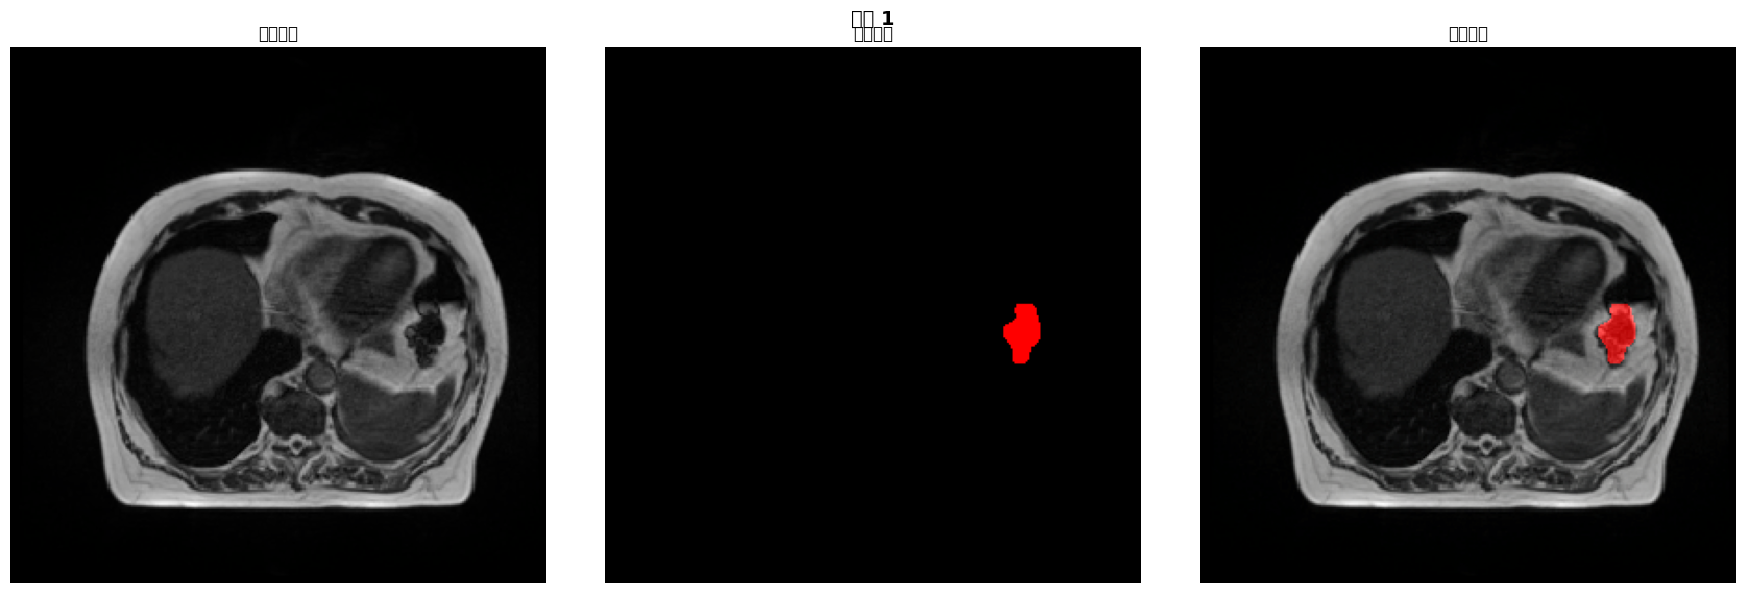

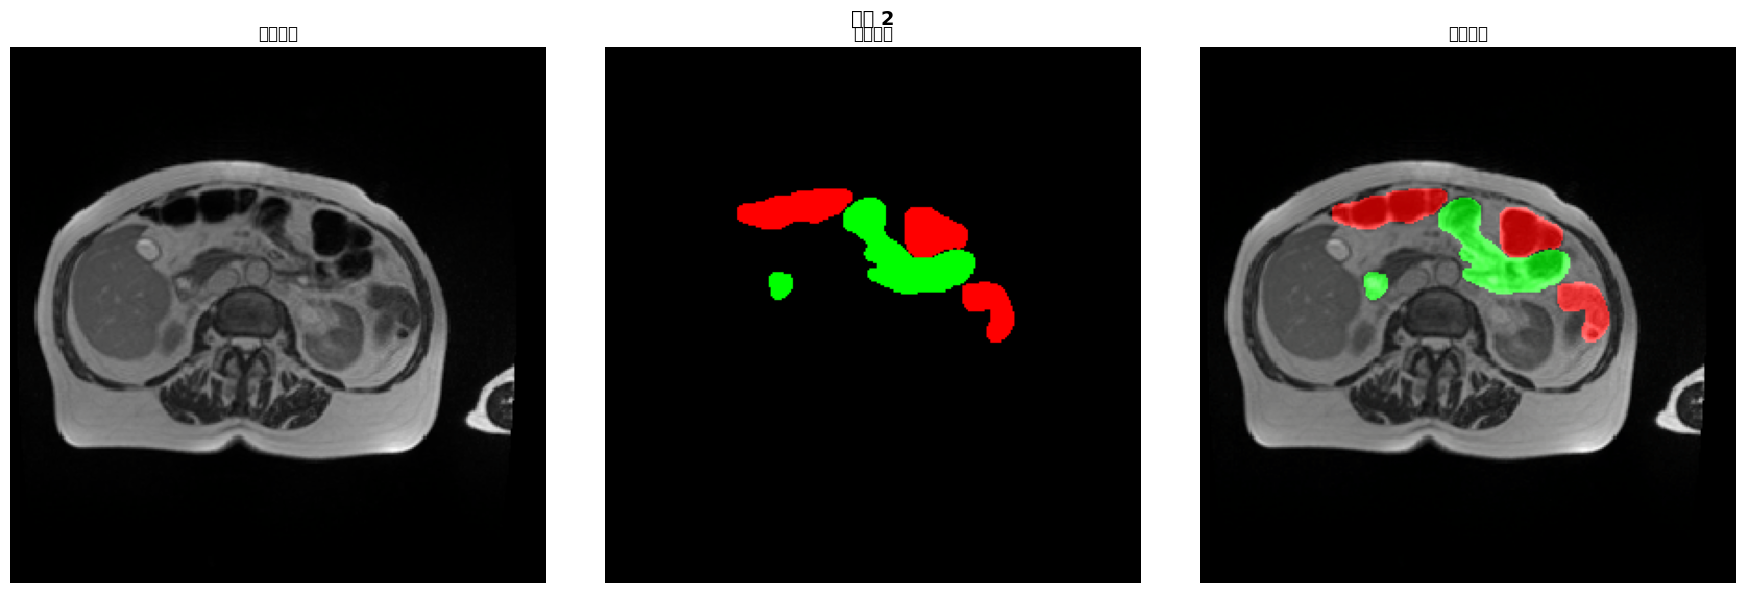

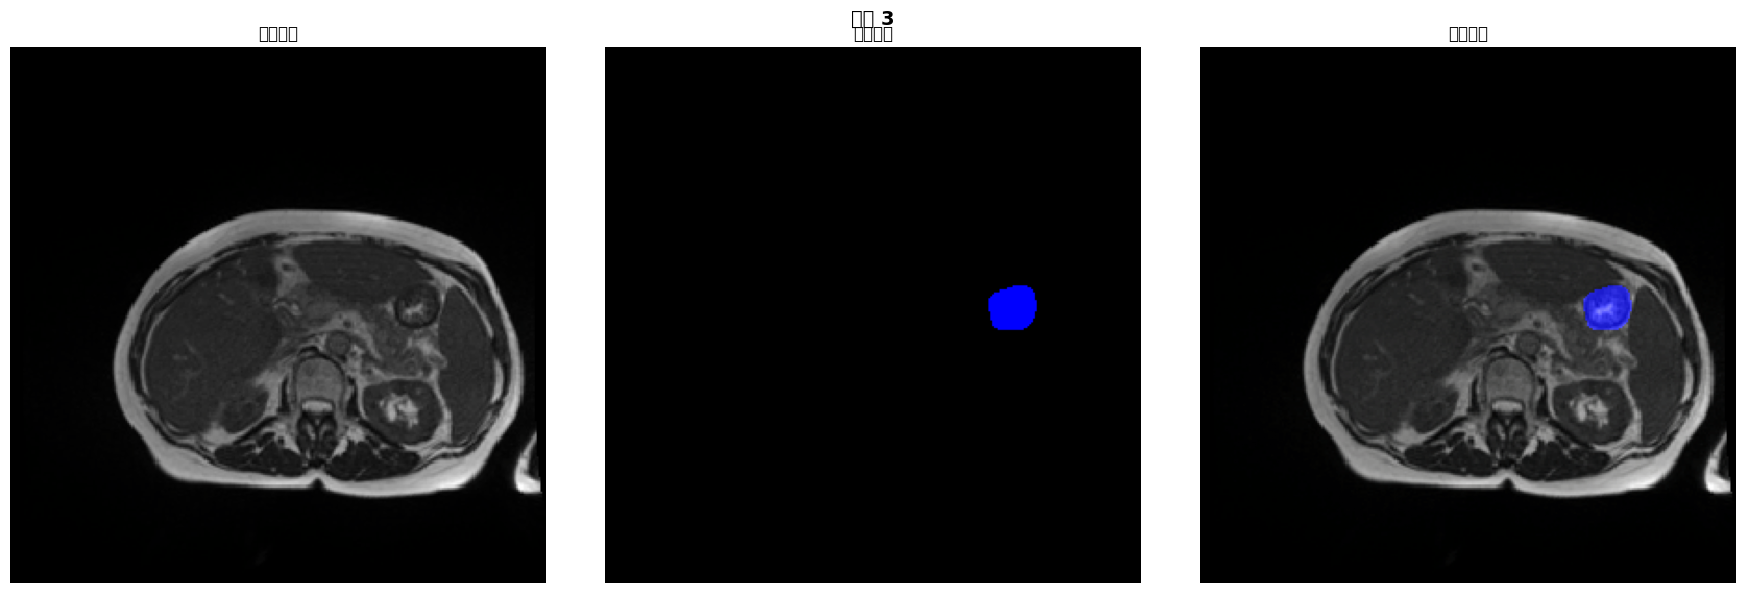


✓ 数据可视化完成！


In [12]:
print("="*70)
print("可视化验证集样本")
print("="*70)

# 获取一个批次的数据
for batch_images, batch_masks in valid_loader:
    # 反归一化图像
    batch_images = denormalize(
        batch_images,
        mean=DatasetConfig.MEAN,
        std=DatasetConfig.STD
    )
    
    # 转换为numpy格式: (B, C, H, W) -> (B, H, W, C)
    batch_images = batch_images.permute(0, 2, 3, 1).numpy()
    batch_masks = batch_masks.numpy()

    print(f"\n批次形状:")
    print(f"  - 图像: {batch_images.shape}")
    print(f"  - 掩码: {batch_masks.shape}")
    
    # 显示前3个样本
    display_image_and_mask(
        images=batch_images,
        masks=batch_masks,
        max_display=3
    )
    
    break  # 只显示第一个批次

print("\n✓ 数据可视化完成！")

## 4 Loading SegFormer From 🤗 HuggingFace

## 4 从🤗 HuggingFace加载SegFormer

The SegFormer model was proposed in the paper titled <a href="https://arxiv.org/abs/2105.15203" target="_blank">SegFormer: Simple and Efficient Design for Semantic Segmentation with Transformers.</a> The model consists of a hierarchical a href="learnopencv.com/the-future-of-image-recognition-is-here-pytorch-vision-transformer/" target="_blank">Transformer</a> encoder made of efficient multi-head attention modules and a final lightweight all-MLP decoder head.

Abstract from the paper:

> We present SegFormer, a simple, efficient yet powerful semantic segmentation framework which unifies Transformers with lightweight multilayer perception (MLP) decoders. SegFormer has two appealing features: 1) SegFormer comprises a novel hierarchically structured Transformer encoder which outputs multiscale features. It does not need positional encoding, thereby avoiding the interpolation of positional codes which leads to decreased performance when the testing resolution differs from training. 2) SegFormer avoids complex decoders. The proposed MLP decoder aggregates information from different layers, and thus combining both local attention and global attention to render powerful representations. We show that this simple and lightweight design is the key to efficient segmentation on Transformers. We scale our approach up to obtain a series of models from SegFormer-B0 to SegFormer-B5, reaching significantly better performance and efficiency than previous counterparts. For example, SegFormer-B4 achieves 50.3% mIoU on ADE20K with 64M parameters, being 5x smaller and 2.2% better than the previous best method. Our best model, SegFormer-B5, achieves 84.0% mIoU on Cityscapes validation set and shows excellent zero-shot robustness on Cityscapes-C.

<img src="https://learnopencv.com/wp-content/uploads/2023/07/medical-image-segmentation_Segformer_architecture.png" width="75%" align="center">

Source: Arxiv paper

SegFormer模型在题为<a href="https://arxiv.org/abs/2105.15203" target="_blank">SegFormer：基于Transformer的简单高效语义分割设计。</a>该模型由分层Transformer编码器（采用高效多头注意力模块）与最终轻量级全MLP解码器头组成。

论文摘要：

> 我们提出 SegFormer，一个简单高效且强大的语义分割框架，它将 Transformer 与轻量级多层感知器（MLP）解码器相结合。SegFormer 具有两个突出特点：1) 它包含一个新型分层结构的 Transformer 编码器，可输出多尺度特征。该编码器无需位置编码，从而避免了位置编码插值问题——当测试分辨率与训练分辨率不同时，该问题会导致性能下降。2) 规避复杂解码器设计。提出的MLP解码器通过聚合多层信息，同时融合局部注意力与全局注意力机制，生成强力表征。我们证明这种轻量化设计是Transformer实现高效分割的关键。通过扩展模型规模，我们构建了从SegFormer-B0到SegFormer-B5的系列模型，在性能与效率上显著超越前代方案。例如，SegFormer-B4在ADE20K数据集上以6400万参数实现50.3%的mIoU，模型规模缩小5倍的同时性能提升2.2%。我们的最佳模型SegFormer-B5在Cityscapes验证集上达到84.0%的mIoU，并在Cityscapes-C数据集展现出卓越的零样本鲁棒性。

<img src="https://learnopencv.com/wp-content/uploads/2023/07/medical-image-segmentation_Segformer_architecture.png" width="75%" align="center">

来源：Arxiv论文

**You can check all the trained weights available for SegFormer model on HuggingFace <a href="https://huggingface.co/models?pipeline_tag=image-segmentation&sort=downloads&search=nvidia%2Fsegformer" target="_blank">over here.</a>**

**您可以在HuggingFace上查看SegFormer模型所有可用的训练权重，具体请点击此处：<a href="https://huggingface.co/models?pipeline_tag=image-segmentation&sort=downloads&search=nvidia%2Fsegformer" target="_blank">此处</a>。**

Loading a pre-trained model version and getting it ready for inference or finetuning is very easy, thanks to HuggingFace. We only have to pass the following:

1. `pretrained_model_name_or_path`: (string). The id/path of a pre-trained model hosted on the Huggingface model zoo.
2. `num_labels`: (int) The number of channels (one for each class) we want the model to give as output. Suppose the number differs from the original number. In that case, the layer will be replaced with a new layer with randomly initialized weights.
3. `ignore_mismatched_sizes`: (bool) Boolean value to whether or not to ignore the weight key mismatch. Here, it occurs because we change the `num_labels` value.

借助HuggingFace，加载预训练模型版本并使其准备就绪进行推理或微调变得非常简单。我们只需传递以下参数：

1. `pretrained_model_name_or_path`: (字符串)。Huggingface模型动物园中托管的预训练模型的ID/路径。
2. `num_labels`：（整数）模型输出通道数（每类对应一个通道）。若该数值与原始通道数不同，则该层将被替换为权重随机初始化的新层。
3. `ignore_mismatched_sizes`：（布尔值）用于控制是否忽略权重键名不匹配的情况。此处因修改`num_labels`值而引发该问题。

### 4.1 Introduction to SegFormer

SegFormer is an efficient semantic segmentation model proposed by NVIDIA, featuring the following characteristics:
- **Hierarchical Transformer Encoder**: Extracts multi-scale features
- **Lightweight MLP Decoder**: Aggregates multi-scale information
- **No Position Encoding**: Avoids performance degradation from interpolation
- **High Efficiency**: Low computational cost while maintaining high accuracy

**Available SegFormer Models**:
- `segformer-b0`: Minimal model (~4M parameters)
- `segformer-b1`: Small model (~14M parameters)
- `segformer-b2`: Medium model (~28M parameters)
- `segformer-b3`: Large model (~47M parameters)
- `segformer-b4`: Extra-large model (~64M parameters)
- `segformer-b5`: Maximum model (~84M parameters)

### 4.1 SegFormer简介

SegFormer是NVIDIA提出的高效语义分割模型，具有以下特点：
- **分层Transformer编码器**: 提取多尺度特征
- **轻量级MLP解码器**: 聚合多尺度信息
- **无需位置编码**: 避免插值导致的性能下降
- **高效**: 在保持高精度的同时计算量较小

**可用的SegFormer模型**:
- `segformer-b0`: 最小模型 (~4M参数)
- `segformer-b1`: 小型模型 (~14M参数)
- `segformer-b2`: 中型模型 (~28M参数)
- `segformer-b3`: 大型模型 (~47M参数)
- `segformer-b4`: 超大型模型 (~64M参数)
- `segformer-b5`: 最大模型 (~84M参数)

In [13]:
def get_model(*, model_name: str, num_classes: int) -> SegformerForSemanticSegmentation:
    """从HuggingFace加载SegFormer模型
    
    Args:
        model_name: 预训练模型名称或路径
        num_classes: 输出类别数（与预训练模型可以不同）
        
    Returns:
        SegFormer模型实例
    """
    print(f"\n正在加载模型: {model_name}")
    print(f"输出类别数: {num_classes}")
    
    model = SegformerForSemanticSegmentation.from_pretrained(
        model_name,
        num_labels=num_classes,
        ignore_mismatched_sizes=True,  # 忽略分类头的大小不匹配
    )
    
    print("✓ 模型加载完成！")
    return model


print("✓ 模型加载函数定义完成！")

✓ 模型加载函数定义完成！


### 4.2 Testing Model Loading and Forward Propagation
### 4.2 测试模型加载和前向传播

In [14]:
print("="*70)
print("测试模型")
print("="*70)

# 加载模型
model = get_model(
    model_name=TrainingConfig.MODEL_NAME,
    num_classes=DatasetConfig.NUM_CLASSES
)

# 创建虚拟输入
dummy_data = torch.randn(1, 3, *DatasetConfig.IMAGE_SIZE[::-1])  # (B, C, H, W)
dummy_target = torch.randint(0, DatasetConfig.NUM_CLASSES, (*DatasetConfig.IMAGE_SIZE[::-1],)).unsqueeze(0)

print(f"\n虚拟输入形状:")
print(f"  - 图像: {dummy_data.shape}")
print(f"  - 目标: {dummy_target.shape}")

# 前向传播
with torch.no_grad():
    outputs = model(pixel_values=dummy_data, labels=dummy_target, return_dict=True)

print(f"\n模型输出:")
print(f"  - Logits形状: {outputs['logits'].shape}")
print(f"  - 内置损失: {outputs['loss'].item():.4f}")

# 上采样输出以匹配输入大小
upsampled_logits = F.interpolate(
    outputs["logits"],
    size=dummy_target.shape[-2:],
    mode="bilinear",
    align_corners=False
)

print(f"  - 上采样后形状: {upsampled_logits.shape}")
print("\n注意: 模型输出的logits需要上采样到输入图像大小！")
print("✓ 模型测试完成！")

测试模型

正在加载模型: nvidia/segformer-b0-finetuned-ade-512-512
输出类别数: 4


Some weights of SegformerForSemanticSegmentation were not initialized from the model checkpoint at nvidia/segformer-b0-finetuned-ade-512-512 and are newly initialized because the shapes did not match:
- decode_head.classifier.bias: found shape torch.Size([150]) in the checkpoint and torch.Size([4]) in the model instantiated
- decode_head.classifier.weight: found shape torch.Size([150, 256, 1, 1]) in the checkpoint and torch.Size([4, 256, 1, 1]) in the model instantiated
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


✓ 模型加载完成！

虚拟输入形状:
  - 图像: torch.Size([1, 3, 288, 288])
  - 目标: torch.Size([1, 288, 288])

模型输出:
  - Logits形状: torch.Size([1, 4, 72, 72])
  - 内置损失: 1.3929
  - 上采样后形状: torch.Size([1, 4, 288, 288])

注意: 模型输出的logits需要上采样到输入图像大小！
✓ 模型测试完成！


* The model's forward pass takes multiple arguments <a href="https://huggingface.co/docs/transformers/v4.15.0/model_doc/segformer#transformers.SegformerForSemanticSegmentation.forward" target="_blank">[SegFormer Documentation]</a>. The two important ones are `pixel_values` and `labels`.
* The `pixel_values` argument refers to the input images. The `labels` argument is for passing the ground-truth mask.
* The model's forward pass also calculates the cross-entropy loss if `labels` are passed.
* The output logits are smaller than the input image size. To get the **outputs** to match the input image size, we need to simply **upsample** it.

* 该模型的前向传播需要多个参数 <a href="https://huggingface.co/docs/transformers/v4.15.0/model_doc/segformer#transformers.SegformerForSemanticSegmentation.forward" target="_blank">[SegFormer 文档]</a>。其中两个重要参数是 `pixel_values` 和 `labels`。
* `pixel_values` 参数指代输入图像。`labels` 参数用于传递真实标签掩膜。
* 若传递 `labels`，模型前向传播时还会计算交叉熵损失。
* 输出逻辑值小于输入图像尺寸。要使**输出**与输入图像尺寸匹配，只需进行**上采样**即可。

### 4.3 Inspecting the Model Structure
### 4.3 查看模型结构

In [15]:
# 打印模型摘要
print("\n" + "="*70)
print("模型结构摘要")
print("="*70)

model_summary = summary(
    model,
    input_size=(1, 3, *DatasetConfig.IMAGE_SIZE[::-1]),
    depth=2,
    device="cpu",
    verbose=0
)

print(model_summary)


模型结构摘要
Layer (type:depth-idx)                                                      Output Shape              Param #
SegformerForSemanticSegmentation                                            [1, 4, 72, 72]            --
├─SegformerModel: 1-1                                                       [1, 32, 72, 72]           --
│    └─SegformerEncoder: 2-1                                                [1, 32, 72, 72]           3,319,392
├─SegformerDecodeHead: 1-2                                                  [1, 4, 72, 72]            --
│    └─ModuleList: 2-2                                                      --                        132,096
│    └─Conv2d: 2-3                                                          [1, 256, 72, 72]          262,144
│    └─BatchNorm2d: 2-4                                                     [1, 256, 72, 72]          512
│    └─ReLU: 2-5                                                            [1, 256, 72, 72]          --
│    └─Dropout: 2-6     

To access the model's output, we have to use the `["logits"]` key. Similarly, we can access the loss via the `"loss"` key.

要访问模型的输出，我们需要使用 `[“logits”]` 键。同样地，我们可以使用 `“loss”` 键访问损失值。

## 5 Evaluation Metric  & Loss Function
## 5 评估指标与损失函数

The **Dice Coefficient** (otherwise known as the *F1-Score*) is a function that is commonly used in the context of segmentation and is often specifically used as the basis for a loss function for segmentation problems. We will write the custom loss function next based on the Dice Coefficient, but let's first provide the motivation for why this might be a good idea.

For a binary classification problem, the metric is defined as follows using set notation, where `A` and `B` are segmentation masks representing the ground truth mask and the predicted segmentation map.
<br>

$$
Dice = \frac{2*|A\cap B\hspace{1mm}|}{|A\hspace{1mm}| + |B\hspace{1mm}|} \hspace{2mm}
$$

Simply put, the metric is twice the overlap area divided by the total number of pixels in both images. As you can see, the Dice Coefficient is very similar to IoU. Both metrics range from `0` to `1` and are positively correlated with each other. In terms of confusion matrix components, the metric can also be defined as follows:

<br>
$$Dice =  \hspace{2mm} \frac{2TP}{2TP + FP + FN}$$
<br>

However, the Dice Coefficient is not quite as intuitive as IoU. To better understand the formulation, we need to consider two important quantities that lead to its development: Precision and Recall, as defined below.
<br>

$$P:= \frac{TP}{TP + FP}  \hspace{10mm} R:= \frac{TP}{TP + FN}$$


<br>
Precision is a measure of how precise the model is in making predictions (quality or purity of the positive predictions), and Recall considers what we missed or describes the completeness of the positive predictions.
This is the motivation that gave rise to the development of the Dice Coefficient (F1-Score) below, defined as the harmonic mean of the two quantities (a balancing between the two quantities):
<br>

$$Dice = (\frac{2}{\frac{1}{P} + \frac{1}{R}}) \hspace{2mm} =  \hspace{2mm} \frac{2TP}{2TP + FP + FN}$$
<br>

Another way to look at each component is by referring to the following figure from Wikipedia for the <a href="https://en.wikipedia.org/wiki/F-score" target="_blank">F1-Score</a>. Here we see that it's important to consider which elements are relevant and which elements are retrieved. In this context, it is easy to see that both Precision and Recall are essential components for quantifying the accuracy of a model.

<img src='https://opencv.org/wp-content/uploads/2022/07/c4-05-precision-recall.png' align='center' width="60%">

---

Note that the Dice Coefficient can also be used as an evaluation metric and is used in the Kaggle competition as an evaluation metric along with 3D Hausdorff distance. But since, for this project, we are focusing on 2D images, we will stick with the Dice coefficient as our primary evaluation metric.

**Dice系数**（亦称*F1分数*）是分割领域常用的函数，常被专门用作分割问题的损失函数基础。接下来我们将基于Dice系数编写自定义损失函数，但首先需阐明采用此方法的合理性。

对于二分类问题，该指标采用集合符号定义如下，其中`A`和`B`分别表示真实标签掩膜与预测分割图：
<br>

$$
Dice = \frac{2*|A\cap B\hspace{1mm}|}{|A\hspace{1mm}| + |B\hspace{1mm}|} \hspace {2mm}
$$

简言之，该指标等于两图像重叠面积的两倍除以两图像像素总和。可见Dice系数与IoU极为相似：两者取值范围均为`0`至`1`，且呈正相关关系。若从混淆矩阵角度定义，该指标可表示为：

<br>
$$Dice =  \hspace{2mm} \frac{2TP}{2TP + FP + FN}$$
<br>

然而Dice系数不如IoU直观。为理解其推导过程，需关注两个关键量：精确率与召回率，定义如下：
<br>

$$P:= \frac{TP}{TP + FP}  \hspace{10mm} R:= \frac{TP}{TP + FN}$$


<br>
精确度衡量模型预测的精准程度（即正样本预测的质量或纯度），而召回度关注遗漏情况或描述正样本预测的完整性。
正是基于此动机，我们提出了下文将阐述的Dice系数（F1分数），其定义为两者之间的调和平均值（即两者之间的平衡）：
<br>

$$Dice = (\frac{2}{\frac{1}{P} + \frac{1}{R}}) \hspace{2mm} =  \hspace{2mm} \frac{2TP}{2TP + FP + FN}$$
<br>

另一种理解各组成部分的方式是参考维基百科关于<a href="https://en.wikipedia.org/wiki/F-score" target="_blank">F1分数</a>的说明图。从中可见，区分相关元素与检索元素至关重要。由此不难看出，精确率和召回率都是量化模型准确性的关键指标。

<img src='https://opencv.org/wp-content/uploads/2022/07/c4-05-precision-recall.png' align='center' width="60%">

---

需注意Dice系数同样可作为评估指标，在Kaggle竞赛中常与3D豪斯多夫距离并列使用。但鉴于本项目聚焦于二维图像，我们将坚持采用Dice系数作为主要评估指标。

In practice, we found that using a combined loss (Dice loss + CCE loss) works better than Dice loss alone. This is also supported by our experiments:

<img src="https://learnopencv.com/wp-content/uploads/2023/07/medical-image-segmentation_run_f1_compare.png">

The gray one refers to *Dice + CE loss* & the green is for *only Dice loss*

实践中我们发现，采用复合损失函数（Dice损失 + CCE损失）的效果优于单独使用Dice损失。实验结果也印证了这一结论：

<img src="https://learnopencv.com/wp-content/uploads/2023/07/medical-image-segmentation_run_f1_compare.png">

灰色曲线代表*Dice + CE损失*，绿色曲线代表*仅Dice损失*

In this project, we won’t be using the CE loss returned by the model for training. Instead, we will define our custom combo loss function that combines the Smooth Dice coefficient & CE to compute the loss.summary(model, input_size=(1, 3, *DatasetConfig.IMAGE_SIZE[::-1]), depth=2, device="cpu")

在本项目中，我们将不使用模型返回的CE损失进行训练。取而代之的是，我们将定义自定义组合损失函数，该函数结合平滑Dice系数与CE计算损失值。summary(model, input_size=(1, 3, *DatasetConfig.IMAGE_SIZE[::-1]), depth=2, device="cpu")



In [16]:
def dice_coef_loss(
    predictions: torch.Tensor,
    ground_truths: torch.Tensor,
    num_classes: int = 4,
    dims: Tuple[int, int] = (1, 2),
    smooth: float = 1e-8
) -> torch.Tensor:
    """计算Dice系数损失 + 交叉熵损失
    
    Args:
        predictions: 模型预测logits, shape: (B, C, H, W)
        ground_truths: 真实标签, shape: (B, H, W)
        num_classes: 类别数量
        dims: 计算交并集的维度
        smooth: 平滑项，防止除零
        
    Returns:
        组合损失值
    """
    # 1. 将真实标签转为one-hot编码
    ground_truth_oh = F.one_hot(ground_truths, num_classes=num_classes)  # (B, H, W, C)
    
    # 2. 对预测logits应用softmax并调整维度
    prediction_norm = F.softmax(predictions, dim=1).permute(0, 2, 3, 1)  # (B, H, W, C)

    # 3. 计算交集和并集
    intersection = (prediction_norm * ground_truth_oh).sum(dim=dims)
    summation = prediction_norm.sum(dim=dims) + ground_truth_oh.sum(dim=dims)

    # 4. 计算Dice系数
    dice = (2.0 * intersection + smooth) / (summation + smooth)
    dice_mean = dice.mean()

    # 5. 计算交叉熵损失
    ce_loss = F.cross_entropy(predictions, ground_truths)

    # 6. 组合损失: Dice Loss + CE Loss
    # Dice Loss = 1 - Dice Score (转换为损失)
    combined_loss = (1.0 - dice_mean) + ce_loss
    
    return combined_loss


print("✓ 损失函数定义完成！")

# 测试损失函数
print("\n测试损失函数...")
dummy_logits = torch.randn(2, DatasetConfig.NUM_CLASSES, 32, 32)
dummy_labels = torch.randint(0, DatasetConfig.NUM_CLASSES, (2, 32, 32))
test_loss = dice_coef_loss(dummy_logits, dummy_labels, num_classes=DatasetConfig.NUM_CLASSES)
print(f"测试损失值: {test_loss.item():.4f}")
print("✓ 损失函数测试通过！")

✓ 损失函数定义完成！

测试损失函数...
测试损失值: 2.4910
✓ 损失函数测试通过！


### 5.2 Evaluation Metric - Dice Coefficient (F1-Score)


To calculate the Dice score for the medical image segmentation task, we will use the `MulticlassF1Score` class from the `torchmetrics` library with the "`macro`" average reduction method.

**Macro** average refers to a method of calculating average performance in multiclass or multilabel classification problems, which treats all classes equally.

### 5.2 评估指标 - 戴斯系数（F1分数）


为计算医学图像分割任务的戴斯系数，我们将使用`torchmetrics`库中的`MulticlassF1Score`类，并采用“`macro`”平均值计算方法。

**宏**平均法是一种在多类或多标签分类问题中计算平均性能的方法，该方法将所有类别视为平等。

In [17]:
# F1-Score (Dice) 指标已经通过torchmetrics.MulticlassF1Score导入
print("✓ 评估指标: MulticlassF1Score (Dice系数)")
print("  - Average方式: macro (所有类别平等对待)")
print("  - 适用场景: 多类别语义分割")

✓ 评估指标: MulticlassF1Score (Dice系数)
  - Average方式: macro (所有类别平等对待)
  - 适用场景: 多类别语义分割


## 6 Creating The Custom LightningModule Class
## 6 创建自定义 LightningModule 类

The final custom class we need to create is the `MedicalSegmentationModel` which inherits its functionalities from Lightning’s `LightningModule` class.

The `LightningModule` class in pytorch-lightning is a higher-level abstraction that simplifies the training and organizing of PyTorch models. It provides a structured, standardized interface for defining and training deep learning models. It separates the concerns of model definition, optimization, and training loop, making the code more modular and readable.


The class methods we need to define are as follows:

1. Model initialization: `__init__(...)` method where the model and its parameters are defined. This method also includes the initialization of the loss and metric calculation methods.
2. Forward pass: `forward(...)` method where the forward pass of the model is defined.
Training step: training_step(...) method where the training step for each batch is defined. It includes calculating loss and metrics, which are logged for tracking.
3. Validation step: `validation_step(...)` method where the validation step for each batch is defined. It also includes the calculation of loss and metrics.
4. Optimizer configuration: `configure_optimizers(...)` method where the optimizer and, optionally, the learning rate scheduler are defined.

Moreover, two methods, `on_train_epoch_end(...)` and `on_validation_epoch_end(...)`, are defined to log the average loss and f1 score after each epoch for training and validation, respectively.

我们需要创建的最后一个自定义类是`MedicalSegmentationModel`，它继承了Lightning的`LightningModule`类的功能。

pytorch-lightning中的`LightningModule`类是一个更高层次的抽象，它简化了PyTorch模型的训练和组织工作。该类为定义和训练深度学习模型提供了结构化、标准化的接口。它将模型定义、优化和训练循环的关注点分离，使代码更具模块化且易于阅读。


我们需要定义的类方法如下：

1. 模型初始化：`__init__(...)`方法用于定义模型及其参数。该方法还包含损失函数和指标计算方法的初始化。
2. 前向传播：`forward(...)`方法，用于定义模型前向传播流程。
训练步骤：`training_step(...)`方法，用于定义每批次的训练步骤。包含损失与指标计算，并记录日志以便追踪。
3. 验证步骤：`validation_step(...)`方法，用于定义每批次的验证步骤。同样包含损失与指标计算。
4. 优化器配置：`configure_optimizers(...)`方法用于定义优化器，并可选配置学习率调度器。

此外，定义了两个方法：`on_train_epoch_end(...)`和`on_validation_epoch_end(...)`，分别用于在每个训练和验证 epoch 结束后记录平均损失值与F1分数。

In [18]:
class MedicalSegmentationModel(pl.LightningModule):
    """医学图像分割Lightning模块
    
    功能:
    1. 封装SegFormer模型
    2. 定义训练和验证步骤
    3. 配置优化器和学习率调度器
    4. 计算和记录指标
    """
    
    def __init__(
        self,
        model_name: str,
        num_classes: int = 4,
        init_lr: float = 0.001,
        optimizer_name: str = "AdamW",
        weight_decay: float = 1e-4,
        use_scheduler: bool = False,
        scheduler_name: str = "MultiStepLR",
        num_epochs: int = 100,
    ):
        super().__init__()

        # 保存超参数
        self.save_hyperparameters()

        # 加载模型
        # 注意：Lightning会自动管理设备，不需要手动.to(device)
        segformer_model = get_model(model_name=model_name, num_classes=num_classes)
        
        # 使用nn.Module的方式注册子模块，确保Lightning正确管理
        # 这样可以确保checkpoint加载和设备转移都能正常工作
        self.model = segformer_model

        # 初始化指标
        self.mean_train_loss = MeanMetric()
        self.mean_train_f1 = MulticlassF1Score(
            num_classes=num_classes,
            average="macro"
        )
        self.mean_valid_loss = MeanMetric()
        self.mean_valid_f1 = MulticlassF1Score(
            num_classes=num_classes,
            average="macro"
        )

    def forward(self, data: torch.Tensor) -> torch.Tensor:
        """前向传播
        
        Args:
            data: 输入图像 shape: (B, 3, H, W)
            
        Returns:
            上采样后的logits shape: (B, num_classes, H, W)
        """
        outputs = self.model(pixel_values=data, return_dict=True)
        
        # 上采样到输入大小
        upsampled_logits = F.interpolate(
            outputs["logits"],
            size=data.shape[-2:],
            mode="bilinear",
            align_corners=False
        )
        
        return upsampled_logits

    def training_step(self, batch, batch_idx):
        """训练步骤"""
        data, target = batch
        logits = self(data)

        # 计算损失
        loss = dice_coef_loss(
            logits,
            target,
            num_classes=self.hparams.num_classes
        )

        # 更新指标
        self.mean_train_loss(loss, weight=data.shape[0])
        self.mean_train_f1(logits.detach(), target)

        # 记录批次指标（进度条）
        self.log("train/batch_loss", self.mean_train_loss, prog_bar=True, logger=False)
        self.log("train/batch_f1", self.mean_train_f1, prog_bar=True, logger=False)
        
        return loss

    def on_train_epoch_end(self):
        """训练epoch结束时的操作"""
        # 记录epoch指标
        self.log("train/loss", self.mean_train_loss, prog_bar=True)
        self.log("train/f1", self.mean_train_f1, prog_bar=True)
        self.log("epoch", self.current_epoch)

    def validation_step(self, batch, batch_idx):
        """验证步骤"""
        data, target = batch
        logits = self(data)

        # 计算损失
        loss = dice_coef_loss(
            logits,
            target,
            num_classes=self.hparams.num_classes
        )

        # 更新指标
        self.mean_valid_loss.update(loss, weight=data.shape[0])
        self.mean_valid_f1.update(logits, target)

    def on_validation_epoch_end(self):
        """验证epoch结束时的操作"""
        # 记录epoch指标
        self.log("valid/loss", self.mean_valid_loss, prog_bar=True)
        self.log("valid/f1", self.mean_valid_f1, prog_bar=True)
        self.log("epoch", self.current_epoch)

    def configure_optimizers(self):
        """配置优化器和学习率调度器"""
        # 创建优化器
        if self.hparams.optimizer_name in ("AdamW", "Adam"):
            optimizer = getattr(torch.optim, self.hparams.optimizer_name)(
                self.model.parameters(),
                lr=self.hparams.init_lr,
                weight_decay=self.hparams.weight_decay,
                amsgrad=True
            )
        else:
            optimizer = optim.SGD(
                self.model.parameters(),
                lr=self.hparams.init_lr,
                weight_decay=self.hparams.weight_decay
            )

        # 如果使用学习率调度器
        if self.hparams.use_scheduler:
            lr_scheduler = torch.optim.lr_scheduler.MultiStepLR(
                optimizer,
                milestones=[self.hparams.num_epochs // 2],
                gamma=0.1
            )

            lr_scheduler_config = {
                "scheduler": lr_scheduler,
                "interval": "epoch",
                "name": "multi_step_lr"
            }
            
            return {"optimizer": optimizer, "lr_scheduler": lr_scheduler_config}
        
        return optimizer


print("✓ MedicalSegmentationModel类定义完成！")

✓ MedicalSegmentationModel类定义完成！


## 7 Start Training
## 7 开始训练

Once we have organized the `LightningModule` and `LightningDataModule` classes, we can utilize Lightning's `Trainer` class to automate the remaining tasks effortlessly.

The `Trainer` offers a range of valuable deep-learning training functionalities, such as mixed-precision training, distributed training, deterministic training, profiling, gradient accumulation, batch overfitting, and more. Implementing these functionalities correctly can be time-consuming, but it becomes a swift process with the `Trainer` class.

By initializing our `MedicalSegmentationModel` and `MedicalSegmentationDataModule` classes and passing them to the `.fit(...)` method of the `Trainer` class instance, we can promptly commence training. This streamlined approach eliminates the need to implement various training aspects manually, providing convenience and efficiency.

在整理好`LightningModule`和`LightningDataModule`类之后，我们便能借助Lightning的`Trainer`类轻松自动化完成剩余任务。

`Trainer`提供了多种有价值的深度学习训练功能，例如混合精度训练、分布式训练、确定性训练、性能分析、梯度累加、批量过拟合等。正确实现这些功能通常耗时费力，但借助`Trainer`类可大幅提升效率。

通过初始化`MedicalSegmentationModel`和`MedicalSegmentationDataModule`类，并将它们传递给`Trainer`类实例的`.fit(...)`方法，即可快速启动训练流程。这种精简方案省去了手动实现各类训练环节的繁琐操作，显著提升了开发便利性与效率。

### 7.1 Initializing the Model and Data Modules
### 7.1 初始化模型和数据模块

In [19]:
print("="*70)
print("初始化训练")
print("="*70)

# 设置随机种子以保证可重复性
pl.seed_everything(42, workers=True)

# 初始化模型
model = MedicalSegmentationModel(
    model_name=TrainingConfig.MODEL_NAME,
    num_classes=DatasetConfig.NUM_CLASSES,
    init_lr=TrainingConfig.INIT_LR,
    optimizer_name=TrainingConfig.OPTIMIZER_NAME,
    weight_decay=TrainingConfig.WEIGHT_DECAY,
    use_scheduler=TrainingConfig.USE_SCHEDULER,
    scheduler_name=TrainingConfig.SCHEDULER,
    num_epochs=TrainingConfig.NUM_EPOCHS,
)

# 初始化数据模块
data_module = MedicalSegmentationDataModule(
    num_classes=DatasetConfig.NUM_CLASSES,
    img_size=DatasetConfig.IMAGE_SIZE,
    ds_mean=DatasetConfig.MEAN,
    ds_std=DatasetConfig.STD,
    batch_size=TrainingConfig.BATCH_SIZE,
    num_workers=TrainingConfig.NUM_WORKERS,
    pin_memory=torch.cuda.is_available(),
)

print("\n✓ 模型和数据模块初始化完成！")

初始化训练


Seed set to 42



正在加载模型: nvidia/segformer-b0-finetuned-ade-512-512
输出类别数: 4


Some weights of SegformerForSemanticSegmentation were not initialized from the model checkpoint at nvidia/segformer-b0-finetuned-ade-512-512 and are newly initialized because the shapes did not match:
- decode_head.classifier.bias: found shape torch.Size([150]) in the checkpoint and torch.Size([4]) in the model instantiated
- decode_head.classifier.weight: found shape torch.Size([150, 256, 1, 1]) in the checkpoint and torch.Size([4, 256, 1, 1]) in the model instantiated
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


✓ 模型加载完成！

✓ 模型和数据模块初始化完成！


### 7.2 Configuring Callback Functions
Next, we will define a `ModelCheckpoint` and a `LearningRateMonitor` callback for saving the best model during training and the current learning rate of an epoch.

### 7.2 配置回调函数
接下来，我们将定义一个`ModelCheckpoint`和一个`LearningRateMonitor`回调函数，用于在训练过程中保存最佳模型以及每个 epoch 的当前学习率。

In [20]:
# 模型检查点回调（保存最佳模型）
model_checkpoint = ModelCheckpoint(
    monitor="valid/f1",  # 监控验证集F1分数
    mode="max",  # F1越大越好
    filename="ckpt_{epoch:03d}-vloss_{valid/loss:.4f}_vf1_{valid/f1:.4f}",
    auto_insert_metric_name=False,
    save_top_k=1,  # 只保存最好的模型
    verbose=True,
)

# 学习率监控回调
lr_rate_monitor = LearningRateMonitor(logging_interval="epoch")

print("✓ 回调函数配置完成！")
print(f"  - 模型检查点: 监控 valid/f1 (最大化)")
print(f"  - 学习率监控: 每个epoch记录")

✓ 回调函数配置完成！
  - 模型检查点: 监控 valid/f1 (最大化)
  - 学习率监控: 每个epoch记录


### 7.3 Configuring the Logger (Optional)
We will also initialize the `WandbLogger` to upload the training metrics to your wandb project.During the logger initialization, we set two parameters:
1. `log_model=True` - Upload the model as an artifact when the training is completed.
2. `project` - The project name to use on WandB. A project typically contains logs from multiple experiments and their checkpoints.

When the logger is initialized, it will also print the link for the current experiment, which you open on any device to monitor the training process and also share with your team.

### 7.3 配置日志记录器（可选）
我们还将初始化 `WandbLogger`，以便将训练指标上传至您的 WandB 项目。
在日志器初始化过程中，我们设置了两个参数：
1. `log_model=True` - 训练完成后将模型作为工件上传。
2. `project` - WandB 上使用的项目名称。一个项目通常包含多个实验的日志及其检查点。

初始化记录器时，它还会打印当前实验的链接，您可在任何设备上打开该链接以监控训练过程，并可与团队共享。

In [21]:
# 配置日志记录器
if USE_WANDB:
    import wandb
    wandb_logger = WandbLogger(
        log_model=True,
        project="UWM_Medical_Segmentation",
        name=f"segformer_b4_ep{TrainingConfig.NUM_EPOCHS}"
    )
    print("✓ WandB日志记录器已启用")
    logger = wandb_logger
else:
    logger = True  # 使用默认的TensorBoard logger
    print("ℹ️ 使用默认TensorBoard日志记录器")

✓ WandB日志记录器已启用


### 7.4 Start Training

**Note**:
- Training may take a significant amount of time depending on GPU performance
- It is recommended to test with a small number of epochs first (e.g., 10 epochs)
- If GPU memory is insufficient, reduce BATCH_SIZE

### 7.4 开始训练

**注意**:
- 训练可能需要较长时间，取决于GPU性能
- 建议先用少量epoch测试（如10个epoch）
- 如果显存不足，请减小BATCH_SIZE

In [23]:
# 快速训练测试（可选）
QUICK_TEST = True  # 设置为False进行完整训练
TEST_EPOCHS = 2    # 快速测试的epoch数

if QUICK_TEST:
    print("\n⚠️ 快速测试模式启用（仅训练{}个epoch）".format(TEST_EPOCHS))
    print("要进行完整训练，请设置 QUICK_TEST = False\n")
    max_epochs = TEST_EPOCHS
else:
    max_epochs = TrainingConfig.NUM_EPOCHS

# 初始化Trainer
trainer = pl.Trainer(
    accelerator="auto",  # 自动选择加速器（GPU/CPU）
    devices="auto",  # 自动选择可用设备
    strategy="auto",  # 自动选择分布式策略
    max_epochs=max_epochs,
    enable_model_summary=False,  # 我们已经用torchinfo显示了
    callbacks=[model_checkpoint, lr_rate_monitor],
    precision="16-mixed" if torch.cuda.is_available() else 32,  # 混合精度训练（仅GPU）
    accumulate_grad_batches=2,  # 有效批次大小 = 6*2 = 12
    logger=logger,
    log_every_n_steps=10,  # 每10步记录一次
)

print("="*70)
print("开始训练")
print("="*70)
print(f"最大epoch数: {max_epochs}")
print(f"批次大小: {TrainingConfig.BATCH_SIZE}")
print(f"初始学习率: {TrainingConfig.INIT_LR}")
print(f"设备: {trainer.accelerator.__class__.__name__}")
print(f"精度: {trainer.precision}")
print("="*70)

# 开始训练

# 清理GPU缓存，释放未使用的内存
if torch.cuda.is_available():
    torch.cuda.empty_cache()
    torch.cuda.ipc_collect()
    allocated = torch.cuda.memory_allocated() / 1024**3
    print(f"✓ GPU缓存已清理")
    print(f"  当前GPU内存占用: {allocated:.2f}GB")
    print(f"  GPU设备: {torch.cuda.get_device_name(0)}")
print()

trainer.fit(model, data_module)

print("\n" + "="*70)
print("训练完成！")
print("="*70)
print(f"最佳模型保存路径: {model_checkpoint.best_model_path}")
print(f"最佳验证F1分数: {model_checkpoint.best_model_score:.4f}")



⚠️ 快速测试模式启用（仅训练2个epoch）
要进行完整训练，请设置 QUICK_TEST = False



Using 16bit Automatic Mixed Precision (AMP)
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


开始训练
最大epoch数: 2
批次大小: 6
初始学习率: 0.0003
设备: CUDAAccelerator
精度: 16-mixed
✓ GPU缓存已清理
  当前GPU内存占用: 0.08GB
  GPU设备: NVIDIA GeForce RTX 4060 Laptop GPU

✓ 数据集已存在: E:\VSCode_Project\Segformer_medical_lightning\dataset_UWM_GI_Tract_train_valid

数据集统计:
  - 训练集: 13238 张图像
  - 验证集: 3352 张图像


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 0, global step 1103: 'valid/f1' reached 0.84246 (best 0.84246), saving model to '.\\UWM_Medical_Segmentation\\yzsj0txx\\checkpoints\\ckpt_000-vloss_0.4289_vf1_0.8425.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 1, global step 2206: 'valid/f1' reached 0.85364 (best 0.85364), saving model to '.\\UWM_Medical_Segmentation\\yzsj0txx\\checkpoints\\ckpt_001-vloss_0.4165_vf1_0.8536.ckpt' as top 1
`Trainer.fit` stopped: `max_epochs=2` reached.



训练完成！
最佳模型保存路径: .\UWM_Medical_Segmentation\yzsj0txx\checkpoints\ckpt_001-vloss_0.4165_vf1_0.8536.ckpt
最佳验证F1分数: 0.8536


## 8 Inference on the Medical Segmentation Dataset
## 8 基于医学分割数据集的推理

For inference, we will use the same validation data as we did during training. We will plot the ground truth images, the ground truth masks, and the predicted segmentation maps overlayed on the ground truth images.

在推理阶段，我们将使用与训练阶段相同的验证数据。我们将绘制真实图像、真实掩膜，并将预测的分割图叠加在真实图像上进行展示。

### 8.1 Load The Best Trained Model
### 8.1 加载最佳训练模型

Initialize the model with trained weights.

使用训练好的权重初始化模型。

In [24]:
print("="*70)
print("加载最佳模型")
print("="*70)

# 获取最佳模型路径
CKPT_PATH = model_checkpoint.best_model_path
print(f"模型路径: {CKPT_PATH}")

# 设置设备
DEVICE = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(f"目标设备: {DEVICE}")

# 加载模型，使用map_location确保正确加载
print("正在加载checkpoint...")
model = MedicalSegmentationModel.load_from_checkpoint(
    CKPT_PATH,
    map_location=DEVICE
)

# 明确移动整个模型到目标设备
print("移动模型到目标设备...")
model = model.to(DEVICE)

# 强制移动内部SegFormer模型
if hasattr(model, 'model'):
    model.model = model.model.to(DEVICE)
    print(f"✓ 内部SegFormer模型已移动到: {DEVICE}")

# 递归确保所有子模块都在正确的设备上
def move_all_modules_to_device(module, device):
    """递归地将所有子模块移到指定设备"""
    for child in module.children():
        move_all_modules_to_device(child, device)
    module.to(device)

print("递归移动所有子模块...")
move_all_modules_to_device(model, DEVICE)

# 设置为评估模式
model.eval()

# 详细验证
print("✓模型加载完成")
print(f"推理设备: {DEVICE}")

# 检查关键参数的设备
try:
    outer_device = next(model.parameters()).device
    print(f"外层模型设备: {outer_device}")
except StopIteration:
    print("外层模型设备: 无直接参数")

try:
    if hasattr(model, 'model'):
        inner_device = next(model.model.parameters()).device
        print(f"内部SegFormer模型设备: {inner_device}")
        
        # 检查SegFormer编码器的设备
        if hasattr(model.model, 'segformer'):
            encoder_device = next(model.model.segformer.encoder.parameters()).device
            print(f"SegFormer编码器设备: {encoder_device}")
except StopIteration:
    print("内部模型设备: 无法检查")
except Exception as e:
    print(f"设备检查警告: {e}")

# 最终验证：运行一个测试推理
print("正在进行测试推理...")
test_input = torch.randn(1, 3, 288, 288).to(DEVICE)
try:
    with torch.no_grad():
        test_output = model(test_input)
    print(f"✓ 测试推理成功！输出形状: {test_output.shape}")
    print(f"✓ 模型完全准备就绪，可以进行推理！")
except Exception as e:
    print(f"✗ 测试推理失败: {e}")
    raise RuntimeError("模型设备配置仍有问题，请重启kernel并重新运行所有cells")

print("" + "="*70)
print("模型加载和验证完成")
print("="*70)

加载最佳模型
模型路径: .\UWM_Medical_Segmentation\yzsj0txx\checkpoints\ckpt_001-vloss_0.4165_vf1_0.8536.ckpt
目标设备: cuda:0
正在加载checkpoint...

正在加载模型: nvidia/segformer-b0-finetuned-ade-512-512
输出类别数: 4


Some weights of SegformerForSemanticSegmentation were not initialized from the model checkpoint at nvidia/segformer-b0-finetuned-ade-512-512 and are newly initialized because the shapes did not match:
- decode_head.classifier.bias: found shape torch.Size([150]) in the checkpoint and torch.Size([4]) in the model instantiated
- decode_head.classifier.weight: found shape torch.Size([150, 256, 1, 1]) in the checkpoint and torch.Size([4, 256, 1, 1]) in the model instantiated
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


✓ 模型加载完成！
移动模型到目标设备...
✓ 内部SegFormer模型已移动到: cuda:0
递归移动所有子模块...
✓模型加载完成
推理设备: cuda:0
外层模型设备: cuda:0
内部SegFormer模型设备: cuda:0
SegFormer编码器设备: cuda:0
正在进行测试推理...
✓ 测试推理成功！输出形状: torch.Size([1, 4, 288, 288])
✓ 模型完全准备就绪，可以进行推理！
模型加载和验证完成


### 8.2 Evaluate Model On Validation Dataset
### 8.2 在验证数据集上评估模型

Get the best evaluation metrics using the saved model.

使用保存的模型获取最佳评估指标。

In [25]:
print("\n" + "="*70)
print("验证集评估")
print("="*70)

# 准备数据
data_module.setup()
valid_loader = data_module.val_dataloader()

# 初始化评估器
eval_trainer = pl.Trainer(
    accelerator="gpu" if torch.cuda.is_available() else "cpu",
    devices=1,
    enable_checkpointing=False,
    inference_mode=True,
    logger=False,
)

# 运行评估
results = eval_trainer.validate(model=model, dataloaders=valid_loader)

print("\n" + "="*70)
print("最终评估结果")
print("="*70)
print(f"验证损失: {results[0]['valid/loss']:.4f}")
print(f"验证F1分数 (Dice): {results[0]['valid/f1']:.4f}")
print("="*70)

# 记录到WandB
if USE_WANDB and os.environ.get("LOCAL_RANK", None) is None:
    wandb.run.summary["best_valid_f1"] = results[0]["valid/f1"]
    wandb.run.summary["best_valid_loss"] = results[0]["valid/loss"]


验证集评估

数据集统计:
  - 训练集: 13238 张图像
  - 验证集: 3352 张图像


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Validation: |          | 0/? [00:00<?, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃      Validate metric      ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│           epoch           │            0.0            │
│         valid/f1          │     0.853640615940094     │
│        valid/loss         │    0.4165342450141907     │
└───────────────────────────┴───────────────────────────┘


最终评估结果
验证损失: 0.4165
验证F1分数 (Dice): 0.8536


<img src="https://learnopencv.com/wp-content/uploads/2023/07/medical-image-segmentation_best_run_results_chart.png">

*Blue* - Train, *Orange* - Valid

<img src="https://learnopencv.com/wp-content/uploads/2023/07/medical-image-segmentation_best_run_results_chart.png">

*Blue* - Train, *Orange* - Valid

Log them as experiment summary metrics to WandB.

将它们作为实验摘要指标记录到WandB中。

### 8.3 Image Inference Using DataLoader Objects

In the code below, we define a helper function  that performs `inference` given a trained model and a dataloader object. The model prediction will also be uploaded to wandb.

### 8.3 使用数据加载器对象进行图像推理

在下面的代码中，我们定义了一个辅助函数，该函数在给定训练好的模型和数据加载器对象后执行推理操作。模型预测结果也将上传至wandb平台。

In [29]:
@torch.inference_mode()
def inference_and_visualize(
    model,
    loader: DataLoader,
    device: torch.device = torch.device("cpu"),
    num_batches: int = 2,
    samples_per_batch: int = 3
):
    """在验证集上进行推理并可视化结果
    
    Args:
        model: 训练好的模型
        loader: 数据加载器
        device: 推理设备
        num_batches: 要处理的批次数
        samples_per_batch: 每个批次显示的样本数
    """
    model.eval()
    
    print("="*70)
    print("Starting inference and visualization")
    print("="*70)
    
    for batch_idx, (batch_img, batch_mask) in enumerate(loader):
        if batch_idx >= num_batches:
            break
            
        print(f"\nProcessing batch {batch_idx + 1}/{num_batches}...")
        
        # 推理
        batch_img = batch_img.to(device)
        predictions = model(batch_img)
        
        # 获取预测类别
        pred_all = predictions.argmax(dim=1).cpu().numpy()
        
        # 反归一化图像
        batch_img = denormalize(
            batch_img.cpu(),
            mean=DatasetConfig.MEAN,
            std=DatasetConfig.STD
        )
        batch_img = batch_img.permute(0, 2, 3, 1).numpy()
        batch_mask = batch_mask.numpy()
        
        # 显示样本
        for i in range(min(samples_per_batch, len(batch_img))):
            fig, axes = plt.subplots(1, 4, figsize=(20, 5))
            fig.suptitle(
                f"Batch {batch_idx + 1} - Sample {i + 1}",
                fontsize=14,
                fontweight='bold'
            )
            
            # 1. Original Image
            axes[0].imshow(batch_img[i])
            axes[0].set_title("Original Image", fontsize=12)
            axes[0].axis("off")
            
            # 2. 真实掩码
            true_mask_rgb = num_to_rgb(batch_mask[i], color_map=id2color)
            axes[1].imshow(true_mask_rgb)
            axes[1].set_title("Ground Truth", fontsize=12)
            axes[1].axis("off")
            
            # 3. 预测掩码
            pred_mask_rgb = num_to_rgb(pred_all[i], color_map=id2color)
            axes[2].imshow(pred_mask_rgb)
            axes[2].set_title("Prediction", fontsize=12)
            axes[2].axis("off")
            
            # 4. Overlay
            overlayed = image_overlay(batch_img[i], pred_mask_rgb)
            axes[3].imshow(overlayed)
            axes[3].set_title("Overlay", fontsize=12)
            axes[3].axis("off")
            
            plt.tight_layout()
            plt.show()
            
            # 上传到WandB
            if USE_WANDB and os.environ.get("LOCAL_RANK", None) is None:
                import wandb
                images = wandb.Image(
                    fig,
                    caption=f"Batch {batch_idx + 1} - Sample {i + 1}"
                )
                wandb.log({"Predictions": images})
            
            plt.close(fig)
    
    print("\n✓ Inference and visualization completed!")


print("✓ Inference function defined!")

✓ Inference function defined!


In [30]:
# 初始化WandB用于推理可视化
import wandb

wandb.init(
    project="UWM_Medical_Segmentation",
    name="inference_visualization",
    job_type="inference",
    reinit=True  # 允许重新初始化
)

print("✓ WandB已初始化，可以运行推理了")

✓ WandB已初始化，可以运行推理了


Model device: cuda:0
Starting inference and visualization

Processing batch 1/2...


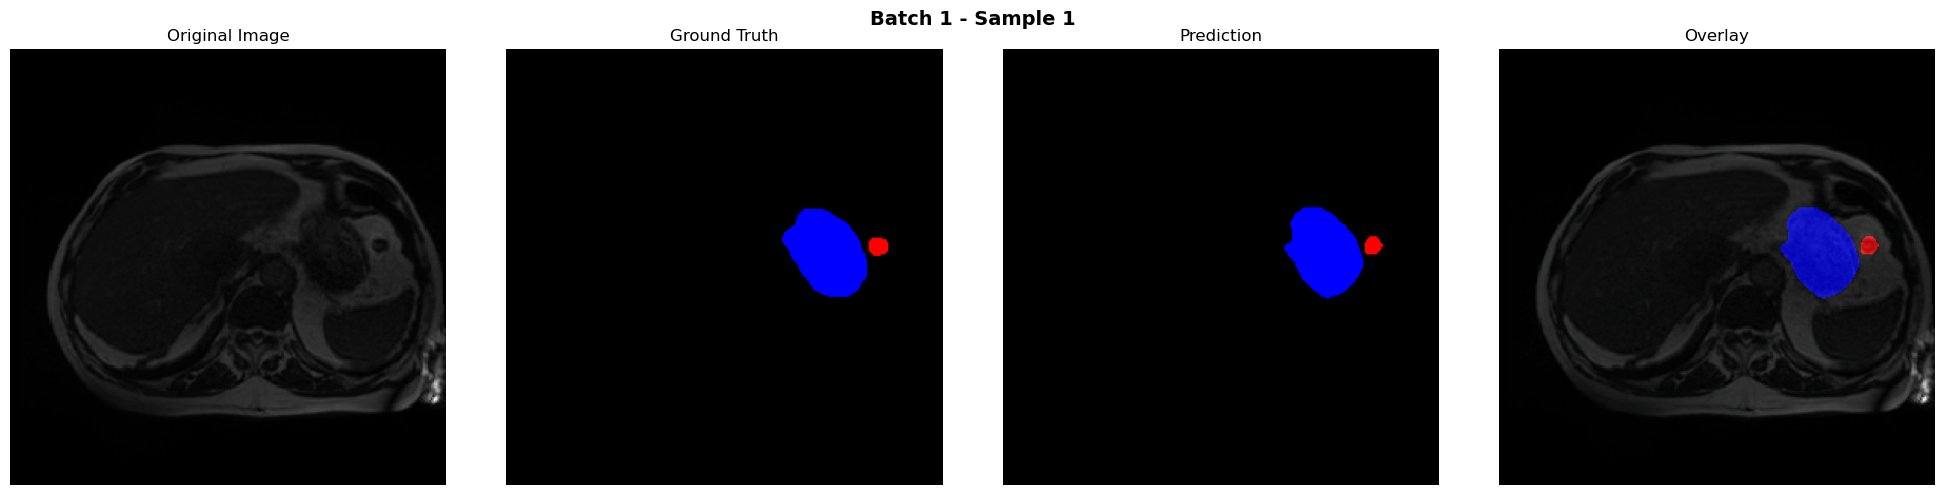

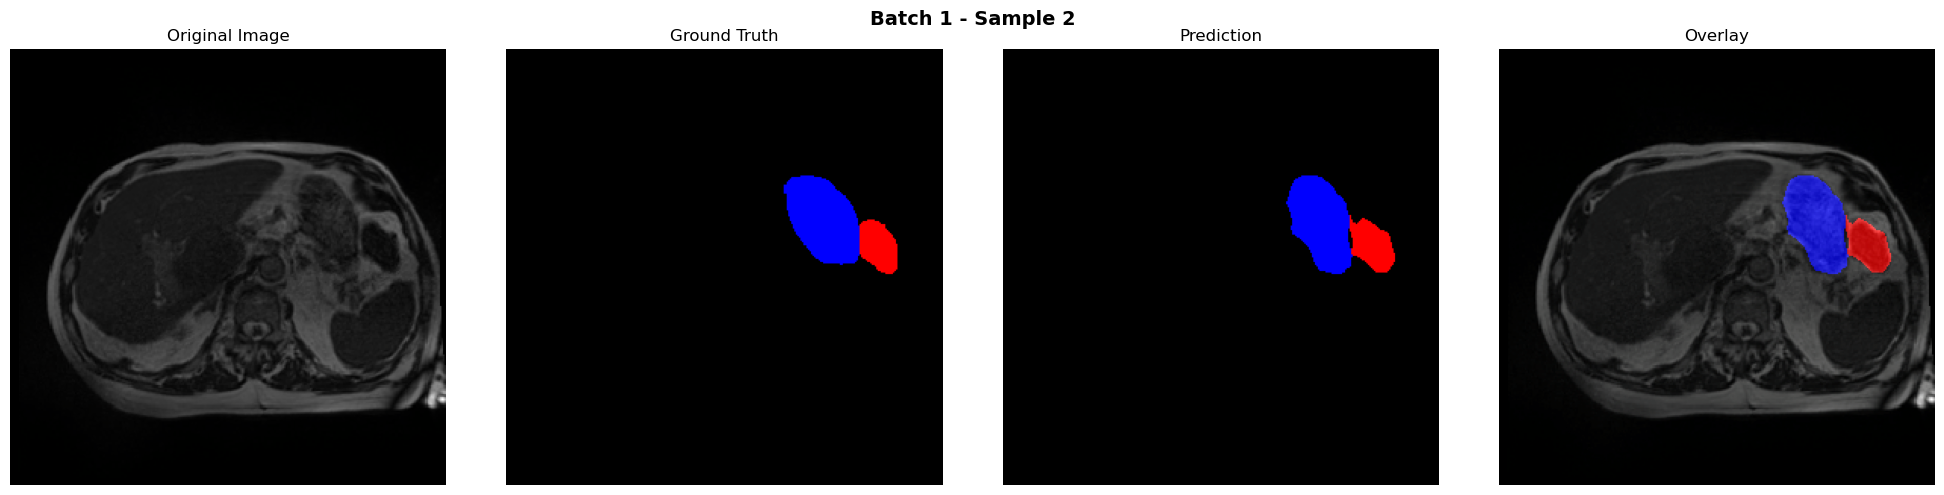

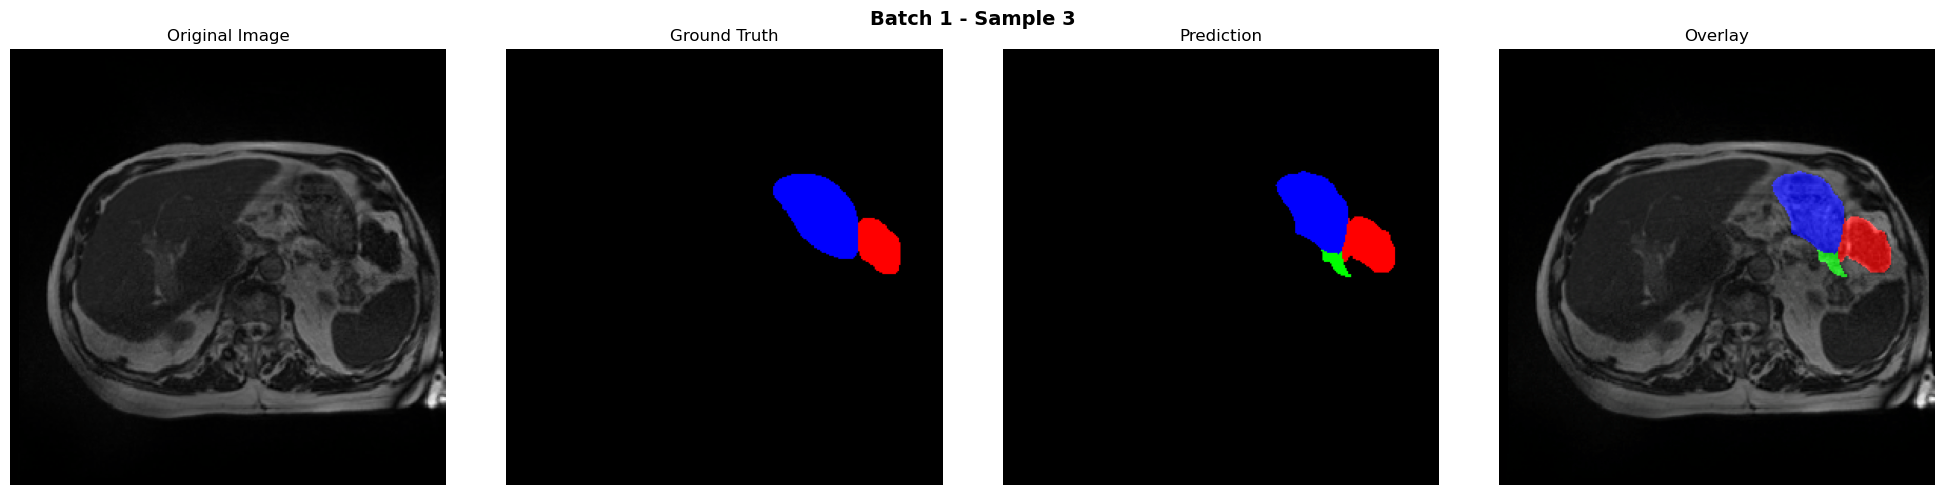


Processing batch 2/2...


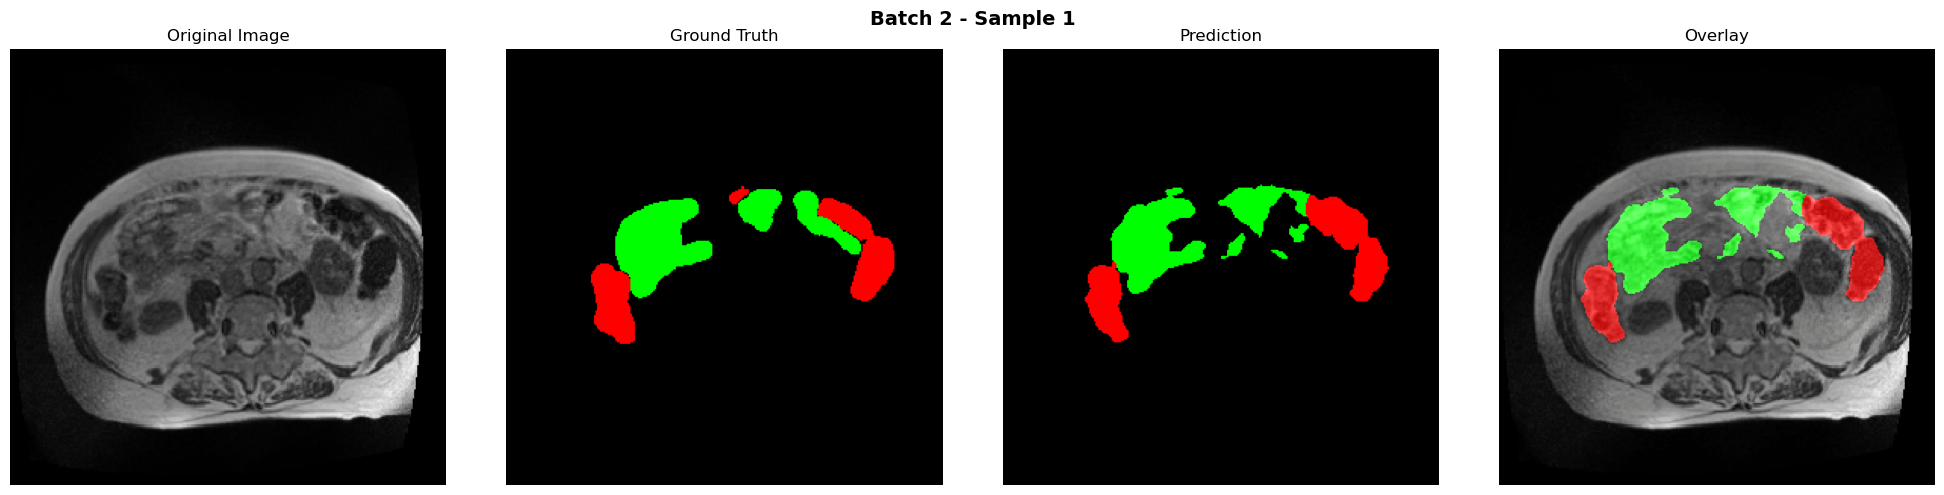

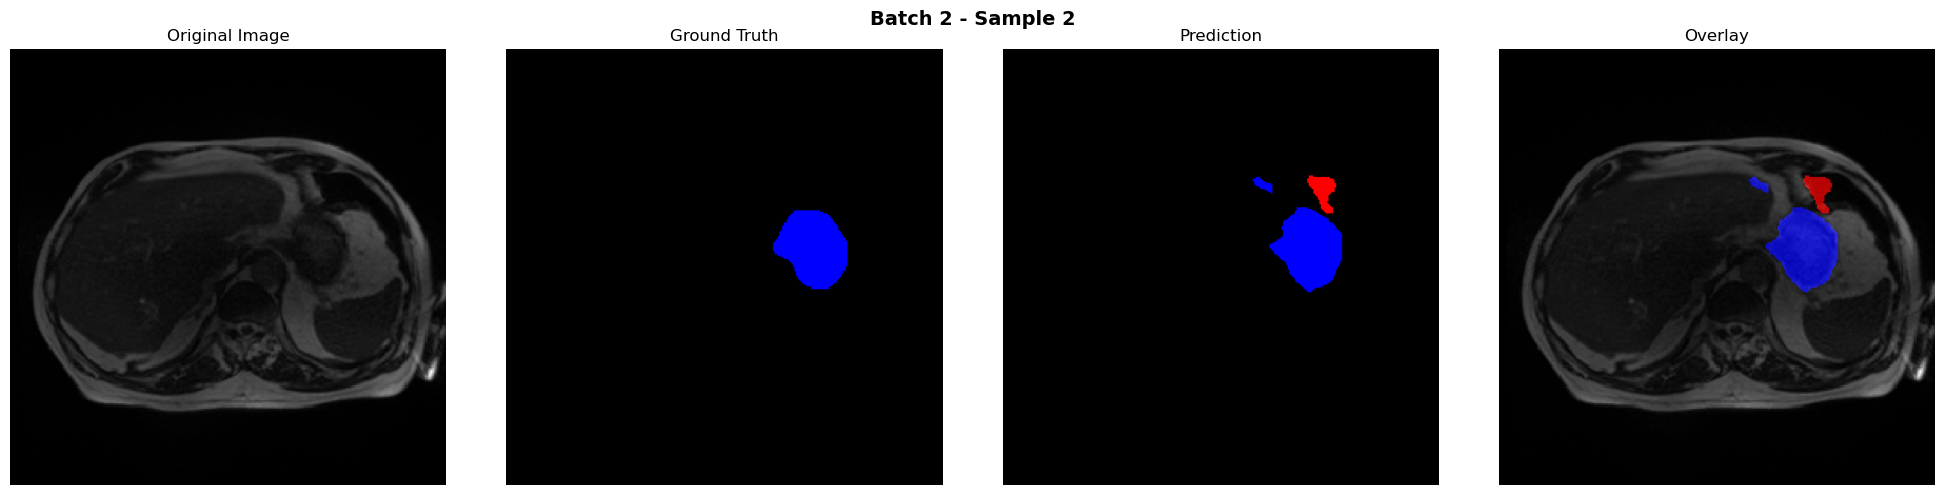

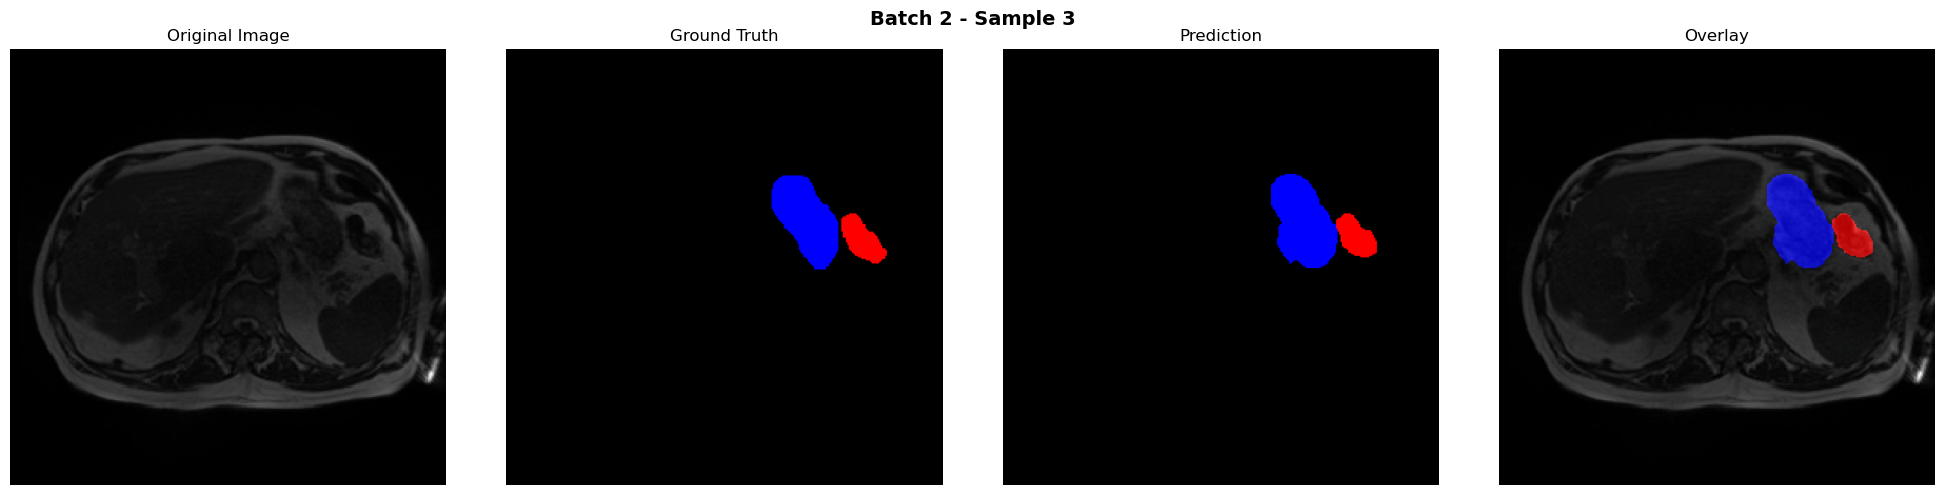


✓ Inference and visualization completed!


In [31]:
# 确保模型在正确的设备上
model = model.to(DEVICE)
print(f"Model device: {next(model.parameters()).device}")

# 运行推理和可视化
inference_and_visualize(
    model=model,
    loader=valid_loader,
    device=DEVICE,
    num_batches=InferenceConfig.NUM_BATCHES,
    samples_per_batch=3
)

## 9. Gradio Web Application

### 9.1 Introduction

Create interactive web applications using Gradio that support uploading medical images and obtaining real-time segmentation results.

**Features**:
- Upload medical images
- Real-time segmentation predictions
- Visualize results (mask + overlay)
- Category statistics

## 9. Gradio Web应用

### 9.1 简介

使用Gradio创建交互式Web应用，支持上传医学图像并获得实时分割结果。

**功能特性**:
- 上传医学图像
- 实时分割预测
- 可视化结果（掩码 + 叠加）
- 类别统计信息

In [32]:
import gradio as gr
print(f"Gradio版本: {gr.__version__}")

Gradio版本: 5.49.1


### 9.2 Defining Helper Functions
### 9.2 定义辅助函数

In [33]:
def preprocess_for_gradio(image: np.ndarray) -> torch.Tensor:
    """预处理Gradio上传的图像"""
    # 确保是RGB格式
    if len(image.shape) == 2:
        image = cv2.cvtColor(image, cv2.COLOR_GRAY2RGB)
    elif image.shape[2] == 4:
        image = cv2.cvtColor(image, cv2.COLOR_RGBA2RGB)

    # 调整大小
    image_resized = cv2.resize(image, DatasetConfig.IMAGE_SIZE, interpolation=cv2.INTER_LINEAR)

    # 归一化和转换为Tensor
    transform = A.Compose([
        A.Normalize(mean=DatasetConfig.MEAN, std=DatasetConfig.STD, always_apply=True),
        ToTensorV2(),
    ])

    transformed = transform(image=image_resized)
    image_tensor = transformed["image"].unsqueeze(0)  # 添加批次维度

    return image_tensor, image  # 返回tensor和原始图像


def get_class_statistics_gradio(mask: np.ndarray) -> str:
    """计算各类别的像素统计"""
    total_pixels = mask.size
    stats = ["## 分割结果统计\n"]

    for class_id in range(DatasetConfig.NUM_CLASSES):
        count = np.sum(mask == class_id)
        percentage = (count / total_pixels) * 100
        stats.append(f"- **{id2name[class_id]}**: {percentage:.2f}% ({count:,} 像素)")

    return "\n".join(stats)


print("✓ 辅助函数定义完成！")

✓ 辅助函数定义完成！


### 9.3 Defining Prediction Functions
### 9.3 定义预测函数

In [34]:
@torch.inference_mode()
def predict_gradio(image: np.ndarray) -> tuple:
    """
    Gradio预测函数

    Args:
        image: 输入的RGB图像 (H, W, 3)

    Returns:
        mask_rgb: RGB分割掩码
        overlay: 叠加图像
        stats: 统计信息文本
    """
    if image is None:
        return None, None, "请上传图像"

    try:
        # 保存原始尺寸
        original_height, original_width = image.shape[:2]

        # 预处理
        image_tensor, _ = preprocess_for_gradio(image)
        image_tensor = image_tensor.to(DEVICE)

        # 推理
        logits = model(image_tensor)

        # 获取预测类别
        pred_mask = logits.argmax(dim=1).squeeze(0).cpu().numpy()

        # 调整掩码到原始尺寸
        pred_mask_resized = cv2.resize(
            pred_mask.astype(np.uint8),
            (original_width, original_height),
            interpolation=cv2.INTER_NEAREST
        )

        # 转换为RGB掩码
        mask_rgb = num_to_rgb(pred_mask_resized, color_map=id2color)

        # 创建叠加图像
        overlay = image_overlay(image / 255.0, mask_rgb / 255.0)

        # 转换为0-255范围
        mask_rgb = (mask_rgb * 255).astype(np.uint8)
        overlay = (overlay * 255).astype(np.uint8)

        # 计算统计信息
        stats = get_class_statistics_gradio(pred_mask_resized)

        return mask_rgb, overlay, stats

    except Exception as e:
        return None, None, f"处理失败: {str(e)}"


print("✓ 预测函数定义完成！")

✓ 预测函数定义完成！


### 9.4 Creating a Gradio Interface
### 9.4 创建Gradio界面

In [35]:
# 准备验证集示例图片
import random
import os

print("正在准备验证集示例图片...")

# 从验证集中随机选择示例图片
valid_image_paths = data_module.valid_ds.image_paths

# 随机选择6张图片作为示例
num_examples = min(6, len(valid_image_paths))
example_images = random.sample(valid_image_paths, num_examples)

print(f"✓ 已选择 {num_examples} 张验证集图片作为示例")
print("示例图片:")
for i, path in enumerate(example_images, 1):
    print(f"  {i}. {os.path.basename(path)}")

正在准备验证集示例图片...
✓ 已选择 6 张验证集图片作为示例
示例图片:
  1. case55_day0_slice_0054_266_266_1.50_1.50.png
  2. case119_day21_slice_0069_266_266_1.50_1.50.png
  3. case108_day0_slice_0089_266_266_1.50_1.50.png
  4. case80_day14_slice_0112_266_266_1.50_1.50.png
  5. case138_day12_slice_0117_266_266_1.50_1.50.png
  6. case134_day22_slice_0069_360_310_1.50_1.50.png


In [36]:
# 创建专业的医学图像分割界面
with gr.Blocks(
    title="Medical Image Segmentation - SegFormer",
    theme=gr.themes.Base(
        primary_hue="indigo",
        secondary_hue="blue",
        neutral_hue="slate",
        font=[gr.themes.GoogleFont("IBM Plex Sans"), "system-ui", "sans-serif"]
    ),
    css="""
        .main-header {
            background: linear-gradient(90deg, #667eea 0%, #764ba2 100%);
            padding: 2rem;
            border-radius: 15px;
            margin-bottom: 2rem;
            box-shadow: 0 4px 6px rgba(0,0,0,0.1);
        }
        .main-header h1 {
            color: white;
            text-align: center;
            font-size: 2.5rem;
            font-weight: 700;
            margin: 0;
            text-shadow: 2px 2px 4px rgba(0,0,0,0.2);
        }
        .main-header p {
            color: rgba(255,255,255,0.9);
            text-align: center;
            font-size: 1.1rem;
            margin-top: 0.5rem;
        }
        .legend-box {
            background: white;
            border: 2px solid #e2e8f0;
            border-radius: 10px;
            padding: 1rem;
            margin: 1rem 0;
        }
        .legend-item {
            display: flex;
            align-items: center;
            margin: 0.5rem 0;
            font-size: 1rem;
        }
        .legend-color {
            width: 30px;
            height: 30px;
            border-radius: 5px;
            margin-right: 10px;
            border: 2px solid #cbd5e0;
        }
        .stats-container {
            background: linear-gradient(135deg, #f6f8fb 0%, #e9ecef 100%);
            border-radius: 10px;
            padding: 1.5rem;
            margin-top: 1rem;
            border: 1px solid #dee2e6;
        }
        .output-section {
            border: 2px solid #e2e8f0;
            border-radius: 10px;
            padding: 1rem;
            background: white;
        }
        .upload-area {
            border: 3px dashed #cbd5e0 !important;
            border-radius: 15px !important;
            background: #f8f9fa !important;
            transition: all 0.3s ease;
        }
        .upload-area:hover {
            border-color: #667eea !important;
            background: #f0f4ff !important;
        }
        .example-gallery {
            margin-top: 2rem;
            padding: 1.5rem;
            background: white;
            border-radius: 10px;
            border: 1px solid #e2e8f0;
        }
    """
) as demo:

    # 标题区域
    gr.HTML(
        """
        <div class="main-header">
            <h1>🏥 Medical Image Segmentation System</h1>
            <p>AI-Powered GI Tract Segmentation using SegFormer Architecture</p>
        </div>
        """
    )

    with gr.Row():
        # 左侧：输入和图例
        with gr.Column(scale=2):
            gr.Markdown("### 📤 Upload Medical Image")
            input_image = gr.Image(
                label="",
                type="numpy",
                height=400,
                sources=["upload", "clipboard"],
                elem_classes="upload-area"
            )

            # 图例说明
            gr.HTML(
                """
                <div class="legend-box">
                    <h4 style="margin-top:0; color:#1e293b;">🎨 Segmentation Legend</h4>
                    <div class="legend-item">
                        <div class="legend-color" style="background-color:#000000;"></div>
                        <span><strong>Background</strong> - Image background</span>
                    </div>
                    <div class="legend-item">
                        <div class="legend-color" style="background-color:#ff0000;"></div>
                        <span><strong>Stomach</strong> - Gastric region</span>
                    </div>
                    <div class="legend-item">
                        <div class="legend-color" style="background-color:#00ff00;"></div>
                        <span><strong>Small Bowel</strong> - Small intestine</span>
                    </div>
                    <div class="legend-item">
                        <div class="legend-color" style="background-color:#0000ff;"></div>
                        <span><strong>Large Bowel</strong> - Large intestine</span>
                    </div>
                </div>
                """
            )

            with gr.Row():
                clear_btn = gr.Button(
                    "🗑️ Clear",
                    variant="secondary",
                    size="sm"
                )
                submit_btn = gr.Button(
                    "🚀 Run Segmentation",
                    variant="primary",
                    size="lg",
                    scale=3
                )

        # 右侧：输出结果
        with gr.Column(scale=3):
            gr.Markdown("### 📊 Segmentation Results")

            with gr.Tabs() as tabs:
                with gr.Tab("🎨 Segmentation Mask"):
                    output_mask = gr.Image(
                        label="",
                        height=400,
                        elem_classes="output-section"
                    )

                with gr.Tab("🖼️ Overlay View"):
                    output_overlay = gr.Image(
                        label="",
                        height=400,
                        elem_classes="output-section"
                    )

            # 统计信息
            gr.Markdown("### 📈 Pixel Statistics")
            output_stats = gr.Markdown(
                value="<div style='text-align:center; color:#64748b; padding:2rem;'>ℹ️ Upload an image and click <strong>Run Segmentation</strong> to see results</div>",
                elem_classes="stats-container"
            )

    # 事件绑定
    submit_btn.click(
        fn=predict_gradio,
        inputs=input_image,
        outputs=[output_mask, output_overlay, output_stats]
    )

    clear_btn.click(
        fn=lambda: (None, None, None, "<div style='text-align:center; color:#64748b; padding:2rem;'>ℹ️ Upload an image and click <strong>Run Segmentation</strong> to see results</div>"),
        outputs=[input_image, output_mask, output_overlay, output_stats]
    )

    # 示例图片区域
    gr.HTML('<div class="example-gallery">')
    gr.Markdown("### 🖼️ Try These Examples")
    gr.Markdown("Click any image below to test the segmentation model on validation dataset samples")
    gr.Examples(
        examples=example_images,
        inputs=input_image,
        outputs=[output_mask, output_overlay, output_stats],
        fn=predict_gradio,
        cache_examples=False,
        label="",
        examples_per_page=6
    )
    gr.HTML('</div>')

    # 底部信息
    with gr.Accordion("ℹ️ About This Application", open=False):
        gr.Markdown(
            """
            ## 🔬 Technical Details

            ### Model Architecture
            - **Base Model**: SegFormer-B0 (NVIDIA)
            - **Parameters**: ~4M
            - **Framework**: PyTorch Lightning + HuggingFace Transformers
            - **Input Size**: 288×288 pixels
            - **Output**: 4-class semantic segmentation

            ### Dataset
            - **Source**: UWM-Madison GI Tract Image Segmentation
            - **Classes**: Background, Stomach, Small Bowel, Large Bowel
            - **Training**: Mixed precision (FP16)
            - **Batch Size**: 6 (optimized for 8GB GPU)

            ### Performance
            - **Inference Speed**: ~50-100ms per image (GPU)
            - **Precision**: 16-bit mixed precision
            - **GPU Acceleration**: CUDA enabled

            ### Usage Instructions
            1. **Upload**: Click the upload area or drag & drop a medical image
            2. **Run**: Click the "Run Segmentation" button
            3. **View**: Switch between tabs to see mask and overlay
            4. **Analyze**: Check pixel statistics below the results

            ### Supported Formats
            - PNG, JPG, JPEG
            - Recommended size: 256×256 to 512×512
            - Images are automatically resized to 288×288

            ---

            **Developed with** PyTorch Lightning • Gradio • HuggingFace
            **Last Updated**: October 2025 • **Version**: 1.0
            """
        )

print("✓ 专业医学图像分割界面创建完成！")


✓ 专业医学图像分割界面创建完成！


### 9.4 Lunching a Gradio Interface
### 9.4 启动Gradio界面

In [37]:
# 启动Gradio界面
print("="*70)
print("准备启动Gradio界面")
print("="*70)

# 先关闭之前的界面（如果有）
try:
    demo.close()
    print("✓ 已关闭之前运行的界面")
    import time
    time.sleep(1)  # 等待端口释放
except Exception as e:
    print("ℹ️ 没有运行中的界面需要关闭")

print("正在启动新界面...")
print("界面将在浏览器中自动打开")
print("如果没有自动打开，请复制下方的URL在浏览器中打开")
print("-" * 70)

demo.launch(
    share=True,           # 创建公共链接
    inbrowser=True,       # 自动在浏览器中打开
    show_error=True       # 显示详细错误信息
    # 不指定server_port，让Gradio自动选择可用端口
)


准备启动Gradio界面
✓ 已关闭之前运行的界面
正在启动新界面...
界面将在浏览器中自动打开
如果没有自动打开，请复制下方的URL在浏览器中打开
----------------------------------------------------------------------
* Running on local URL:  http://127.0.0.1:7860
* Running on public URL: https://5e2bf73d452644b5ff.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


Terminate the wandb experiment run.

终止wandb实验运行。

In [ ]:
# 关闭WandB会话（notebook结束时运行）
print("=" * 70)
print("关闭WandB会话")
print("=" * 70)

if USE_WANDB:
    try:
        if wandb.run is not None:
            wandb.run.finish()
            print("✓ WandB会话已成功关闭")
        else:
            print("ℹ️ WandB会话未启动或已关闭")
    except Exception as e:
        print(f"⚠️ 关闭WandB时出错: {e}")
else:
    print("ℹ️ 未使用WandB，无需关闭会话")

print(" " + "=" * 70)
print("Notebook执行完毕！")
print("=" * 70)

## 10 Summary

Medical image segmentation using deep learning provides significant advantages. Deep learning models excel at capturing complex patterns and features, leading to highly accurate and precise segmentation results compared to traditional methods. Additionally, deep learning algorithms automate segmentation, improving efficiency and enabling analysis of large volumes of medical image data. Moreover, deep learning models demonstrate adaptability and generalization, making them suitable for diverse image characteristics, imaging modalities, patient populations, and clinical settings, expanding their utility in medical imaging applications.

To summarise this article📜, we covered a comprehensive list of related topics:

1. Medical Image Segmentation: Explored the definition and challenges of medical image segmentation.
2. Dataset Preparation: Used the UW-Madison GI Tract segmentation dataset, made observations, and created preprocessed training and validation sets.
3. We defined a few essential functions and classes for PyTorch and PyTorch-Lightning frameworks to facilitate ease of training.
4. We learned how to use the Segformer model from Hugging Face transformers for segmentation and fine-tuned it on our dataset.
5. We defined a custom loss function combining the Dice coefficient with cross-entropy for improved segmentation performance.
6. Training and Metrics Tracking: Trained the model, monitored metrics using WandB, and uploaded the model as an artifact for future use.
7. We designed a user-friendly interface using the Gradio app, making our medical multi-label image classification model accessible to everyone.

## 10 总结

基于深度学习的医学图像分割技术具有显著优势。相较于传统方法，深度学习模型在捕捉复杂模式与特征方面表现卓越，从而实现高度精确的分割结果。此外，深度学习算法通过自动化分割流程提升效率，使海量医学图像数据的分析成为可能。更重要的是，深度学习模型展现出适应性和泛化能力，使其适用于多样化的图像特征、成像模式、患者群体及临床场景，拓展了其在医学影像领域的应用价值。

本文📜涵盖了以下核心议题：

1. 医学图像分割：阐释医学图像分割的定义与挑战。
2. 数据集准备：采用威斯康星大学麦迪逊分校消化道分割数据集，进行观察分析并创建预处理后的训练集与验证集。
3. 定义了PyTorch及PyTorch-Lightning框架中若干核心函数与类，以简化训练流程。
4. 学习使用Hugging Face transformers中的Segformer模型进行分割，并在本数据集上进行微调。
5. 定义了结合Dice系数与交叉熵的自定义损失函数，以提升分割性能。
6. 训练与指标追踪：完成模型训练，通过WandB监控指标，并将模型作为成果上传以供后续使用。
7. 运用Gradio应用设计用户友好界面，使我们的医学多标签图像分类模型可供所有人使用。